<p align = center  
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="center"><br><FONT FACE="times new roman" SIZE=6>
<b>Robby Genetico</b>
<br>
<i><b>Autores:</b></i> <br>
Juan Pablo Barrios Suarez<br>Juan Manuel Vásquez <br>Paula Sofia Godoy<br>Juan Pablo Cortés<br>9º semestre
<br>
<i><b>Asignatura:</b></i> Vida Artificial
<br>
<i><b>Docente:</b></i> Juan Pablo Ospina
<br>
<i><b>Fecha: </b>20/04/2022
<br>
<b>Ciencias de la computación e inteligencia artificial</b></i>
<br>
</FONT>
</p>

## **Lógica de Robby El robot**

In [ ]:
import numpy as np
import random
from tqdm.auto import tqdm

In [ ]:
def create_map(test=False):
  if test:
    # Crear la cuadricula de la presentación
    grid = np.array([
                    [0,0,0,0,1,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,1,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,0,0,0,0,0,0,0,1,0],
                    [1,0,0,1,0,0,0,1,0,0],
                    [0,0,0,0,0,0,0,0,0,0],
                    [0,1,0,0,0,0,0,0,0,0]
                     ])
  else:
    # Crear la cuadrícula y colocar basura aleatoriamente
    return np.array([[random.randint(0, 1) for j in range(10)] for i in range(10)])

In [ ]:
#test="65635365625235325265635365615135315125235325215135315165635365625235325265635365605035305025235325205035305015135315125235325215135315105035305025235325205035305065635356252353252656353656151353151252353252151353151656353656252353252656353454"
#cromosoma = np.array([int(x) for x in test])

def cromosomador():
  return np.array([random.randint(0,7) for x in range(200)])
cromosoma = cromosomador()


In [ ]:
def validacion(cromosoma):
    if len(cromosoma) != 200:
        raise ValueError("El array debe tener una longitud de 200 caracteres.")
    return cromosoma
validacion(cromosoma)

array([6, 3, 3, 3, 3, 6, 4, 2, 6, 4, 6, 6, 2, 5, 3, 0, 2, 7, 7, 6, 3, 2,
       2, 2, 2, 1, 3, 2, 0, 2, 7, 0, 4, 5, 4, 4, 3, 0, 0, 7, 0, 5, 3, 5,
       4, 3, 2, 3, 1, 0, 2, 5, 5, 1, 2, 4, 1, 0, 4, 4, 5, 2, 6, 3, 4, 6,
       2, 3, 7, 6, 0, 0, 0, 4, 3, 7, 2, 0, 0, 7, 5, 4, 4, 1, 3, 0, 5, 7,
       1, 2, 2, 1, 6, 6, 6, 2, 7, 4, 3, 5, 6, 4, 3, 1, 4, 6, 6, 0, 0, 6,
       4, 1, 2, 1, 1, 1, 7, 7, 0, 2, 4, 7, 4, 7, 2, 2, 7, 1, 7, 6, 3, 3,
       3, 2, 2, 1, 4, 4, 6, 5, 6, 5, 1, 4, 2, 2, 3, 0, 5, 5, 7, 4, 1, 1,
       5, 5, 4, 0, 6, 5, 4, 0, 3, 6, 1, 0, 7, 4, 2, 0, 3, 2, 6, 1, 4, 2,
       3, 7, 6, 4, 3, 3, 4, 2, 2, 5, 2, 1, 4, 7, 4, 0, 5, 7, 4, 0, 3, 5,
       6, 1])

In [ ]:
def simulateExp(cromosoma):
  score=0
  moves=0
  pos_x,pos_y=(0,0)
  # Ejecutar el ciclo principal

  # Se crea la grilla
  grid = create_map(False)

  for move in cromosoma:

      # Elegir una nueva dirección aleatoria
      dir_x = 0
      dir_y = 0

      #Elegir direccion nueva parte 2
      if move == 0:
        dir_y+=1
      if move == 1:
        dir_y-=1
      if move == 2:
        dir_x+=1
      if move == 3:
        dir_x-=1
      if move == 5:
        if grid[pos_y][pos_x] == 1:
          score += 10
          grid[pos_y][pos_x] = 0
        else:
          score -= 1
      if move == 6:
        aux = random.randint(0,4)
        if aux == 0:
          dir_y+=1
        if aux == 1:
          dir_y-=1
        if aux == 2:
          dir_x+=1
        if aux == 3:
          dir_x-=1


      # Calcular la nueva posición y verificar límites de la cuadrícula
      new_pos_x = pos_x + dir_x
      new_pos_y = pos_y + dir_y

      if new_pos_x < 0:
          new_pos_x = 0
          score -= 5
      elif new_pos_x > 9:
          new_pos_x = 9
          score -= 5

      if new_pos_y < 0:
          new_pos_y = 0
          score -= 5
      elif new_pos_y > 9:
          new_pos_y = 9
          score -= 5

      # Actualiza la posición
      pos_x=new_pos_x
      pos_y=new_pos_y


      # Incrementar el contador de movimientos
      moves += 1
  return score+1000

In [ ]:
def fitness(cromosoma):
  scores=[simulateExp(cromosoma) for _ in range(30)]
  return sum(scores)/len(scores)

#**Biblioteca**

In [ ]:
import types
import random
import inspect
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod


In [ ]:
class Mutation(ABC):
  @abstractmethod
  def mutate(self):
    raise NotImplementedError()
class Selection(ABC):
  @abstractmethod
  def select(self):
    raise NotImplementedError()
class Cross(ABC):
  @abstractmethod
  def cross(self):
    raise NotImplementedError()

In [ ]:
class SelectionRW(Selection):
  def select(population,fitness):
    prob = fitness / sum(fitness)
    chosen = np.random.choice(len(population), size=len(population),
                              replace=True, p=prob)
    return population[chosen]



class SelectionSUS(Selection):
  def select(population, fitness):
    prob = fitness / sum(fitness)

    n = len(population)
    r = np.random.uniform() / n
    chosen = np.empty((n, population.shape[1]), dtype=population.dtype)
    acum = prob[0]
    i = 0
    for j in range(n):
        while r <= acum:
            chosen[j] = population[i]
            r += 1/n
        i = (i + 1) % n
        acum += prob[i]
    return chosen



class SelectionRB(Selection):
  def select(population,fitness, rate=0.5):
    pop_sort = np.argsort(fitness)[::-1]
    r = np.empty_like(pop_sort)
    r[pop_sort] = np.arange(len(pop_sort))

    prob = (2 - rate) / len(population) + 2 * r * (rate - 1) /\
           (len(population) * (len(population) - 1))

    chosen = population[np.random.choice(len(population),
                                         size=len(population), p=prob)]
    return chosen



class SelectionT(Selection):
  def select(population,fitness, k=2):
    n = len(population)

    idx = np.random.choice(n, size=(n, k), replace=True)

    chosen = []
    for i in range(n):
        tournement = idx[i]

        fitness_ = fitness[tournement]
        winner_idx = np.argmax(fitness_)
        chosen.append(population[tournement[winner_idx]])

    return np.array(chosen)


In [ ]:
class CrossSingle(Cross):
  def cross(parents, crossover_rate=0.5):
    executed = False
    if np.random.rand() < crossover_rate:
      crossover_point = np.random.randint(1, parents.shape[1])

      child1 = np.concatenate((parents[0, :crossover_point],
                              parents[1, crossover_point:]))
      child2 = np.concatenate((parents[1, :crossover_point],
                              parents[0, crossover_point:]))
      executed = True
      return child1, child2, executed

    else:

      return parents[0], parents[1], executed

class CrossDouble(Cross):
  def cross(parents, crossover_rate=0.5):
    executed = False
    if np.random.rand() < crossover_rate:
      crossover_points = np.sort(np.random.choice(parents.shape[1],
                                                  size=2, replace=False))

      child1 = np.concatenate((parents[0, :crossover_points[0]],
                              parents[1, crossover_points[0]:crossover_points[1]],
                              parents[0, crossover_points[1]:]))
      child2 = np.concatenate((parents[1, :crossover_points[0]],
                              parents[0, crossover_points[0]:crossover_points[1]],
                              parents[1, crossover_points[1]:]))
      executed = True
      return child1, child2, executed
    else:
      return parents[0], parents[1], executed

class CrossUniform(Cross):
  def cross(parents, crossover_rate=0.5):
    executed = False
    if np.random.rand() < crossover_rate:
      mask = np.random.choice([False, True], size=len(parents[0]), p=[0.5, 0.5])
      child1 = np.where(mask, parents[1], parents[0])
      child2 = np.where(mask, parents[0], parents[1])
      executed = True
      return child1, child2, executed
    else:
      return parents[0], parents[1], executed


In [ ]:
class MutationFlip(Mutation):
  def mutate(population, mutation_rate=0.5):
    mutated_individual = np.copy(population)
    for i in range(mutated_individual.shape[0]):
        if np.random.random() < mutation_rate:
            flip=np.random.randint(0,7)
            while(flip==mutated_individual[i]):
              flip=np.random.randint(0,7)
            mutated_individual[i] = flip
    return mutated_individual

class MutationScramble(Mutation):
  def mutate(population, mutation_rate=0.5):
    mutated_population = np.copy(population)
    for i in range(population.shape[0]):
        if np.random.random() < mutation_rate:
            start = np.random.randint(0, population.shape[0] - 1)
            end = np.random.randint(start + 1, population.shape[0])
            scramble = np.random.permutation(mutated_population[start:end+1])
            mutated_population[start:end+1] = scramble

    return mutated_population

class MutationSwap(Mutation):
  def mutate(population, mutation_rate=0.5):
    mutated_population = np.copy(population)
    for i in range(population.shape[0]):
        if np.random.random() < mutation_rate:
            j = np.random.randint(population.shape[0])
            mutated_population[i], mutated_population[j] = mutated_population[j], mutated_population[i]

    return mutated_population

class MutationInversion(Mutation):
  def mutate(population, mutation_rate=0.5):
    mutated_population = np.copy(population)
    for i in range(population.shape[0]):
        if np.random.random() < mutation_rate:
            start = np.random.randint(0, population.shape[0] - 1)
            end = np.random.randint(start + 1, population.shape[0])
            mutated_population[start:end+1] = mutated_population[start:end+1][::-1]

    return mutated_population


In [ ]:
class check_classes:

  def check_selection(self,class_select):
    if isinstance(class_select, str):
      cases_RW=['roulette','rw']
      cases_RB=['rank','rb']
      cases_SUS=['sus','st_universal_sample']
      cases_T=['t','tournament']
      c_select=class_select.lower()

      if c_select in cases_RW:
        return SelectionRW
      elif c_select in cases_RB:
        return SelectionRB
      elif c_select in cases_SUS:
        return SelectionSUS
      elif c_select in cases_T:
        return SelectionT
      else:
        raise ValueError("Nombre invalido de la clase Selection")
    elif isinstance(class_select, Selection):
      return class_select
    else:
      raise ValueError("class_selection debe ser un String o un objeto de la clase Selection")

  def check_mutation(self,class_mut):
    if isinstance(class_mut, str):
      cases_F=['flip']
      cases_Sc=['scramble','scr']
      cases_Sw=['swap','sw']
      cases_I=['inversion','inv']
      c_select=class_mut.lower()

      if c_select in cases_F:
        return MutationFlip
      elif c_select in cases_Sc:
        return MutationScramble
      elif c_select in cases_Sw:
        return MutationSwap
      elif c_select in cases_I:
        return MutationInversion
      else:
        raise ValueError("Nombre invalido de la clase Mutation")
    elif isinstance(class_mut, Mutation):
      return class_mut
    else:
      raise ValueError("class_selection debe ser un String o un objeto de la clase Mutation")

  def check_cross(self,class_cross):
    if isinstance(class_cross, str):
      cases_S=['single']
      cases_D=['double']
      cases_U=['uniform']
      c_select=class_cross.lower()

      if c_select in cases_S:
        return CrossSingle
      elif c_select in cases_D:
        return CrossDouble
      elif c_select in cases_U:
        return CrossUniform
      else:
        raise ValueError("Nombre invalido de la clase Cross")
    elif isinstance(class_cross, Cross):
      return class_cross
    else:
      raise ValueError("class_selection debe ser un String o un objeto de la clase Cross")

  def check_fitness_func(self,fitness_f):
    if isinstance(fitness_f,types.FunctionType):
      num_params = len(inspect.signature(fitness_f).parameters)
      if num_params <1 or num_params >1:
          raise ValueError("La función debe recibir un solo parámetro.")
      else:
        return fitness_f
    elif fitness_f == None:
      return lambda pob: sum(pob)
    else:
      #raise ValueError("El atributo fitness_func debe ser del tipo function.")
      return fitness_f

In [ ]:
class Population:
  def __init__(self,size=200,n=100):
    self.n=n
    self.size=size

  def init_population(self):
    arr = np.random.randint(0,7,size=(self.n,self.size))
    arr = arr.astype(np.uint8)
    self.n_population=arr
    self.best_fitness_records=np.array([])
    self.worst_fitness_records=np.array([])
    self.best_ind = list()
    self.fitness = np.array([])

  def boxplot(self):
    plt.figure(figsize=(20,8))
    plt.boxplot(self.fitness)
    plt.title("$Diagrama\ de\ Caja\ del\ Fitness\ de\ la\ Población$")
    plt.ylabel("$Fitness$")
    plt.show()

  def mean_fitness(self):
    plt.figure(figsize=(20,8))
    plt.plot(self.fitness_records)
    plt.title('$Promedio\ de\ fitness\ a\ lo\ largo\ de\ las\ generaciones$')
    plt.xlabel('$Generación$')
    plt.ylabel('$Fitness$')
    plt.show()

  def hist_fitness(self):
    sns.histplot(self.fitness, kde=True)
    sns.set_style("whitegrid")
    sns.set(rc={"figure.figsize": (20, 8)})
    sns.set_palette("husl")
    plt.title('$Histograma\ de\ fitness\ a\ lo\ largo\ de\ las\ generaciones$')
    plt.xlabel('$Fitness$')
    plt.ylabel('$Frecuencia$')
    plt.show()

  def best_and_worst_fitness(self):
    plt.figure(figsize=(20,8))
    plt.plot(self.best_fitness_records, color="Blue", label="Mejor Fitness")
    plt.plot(self.worst_fitness_records, color="Red", label="Peor Fitness")
    plt.title('$Mejor\ y\ peor\ fitness\ a\ lo\ largo\ de\ las\ generaciones$')
    plt.xlabel('$Fitness$')
    plt.ylabel('$Frecuencia$')
    plt.legend()
    plt.show()

  def stats_describe(self):
    print("\t\t <<< RESUMEN ESTADÍSTICO >>> ")
    print("\n-> Media: [",self.fitness.mean(),"]")
    print("\n-> Mediana: [", np.median(self.fitness),"]")
    print("\n-> Desviación standard: [",self.fitness.std(),"]")
    print("\n-> Máximo: [",self.fitness.max(),"]")
    print("\n-> Mínimo: [",self.fitness.min(),"]")


In [ ]:
class GeneticAlgorithm():
  def __init__(self,
               pop,
               max_gen=100,
               prob_mut=0.1,
               prob_cross=0.5,
               elite_size=0.5,
               random_state=None,
               fitness_func=None,
               class_select=None,
               class_cross=None,
               class_mut=None
               ):
    self.pop=pop
    self.max_gen=max_gen
    self.prob_mut=prob_mut
    self.prob_cross=prob_cross
    self.random_state=random_state
    self.elite_size = int(self.pop.n * elite_size)
    checker= check_classes()
    self.fitness_func=checker.check_fitness_func(fitness_func)
    self.class_select=checker.check_selection(class_select)
    self.class_cross=checker.check_cross(class_cross)
    self.class_mut=checker.check_mutation(class_mut)

  def run(self):
    self.pop.init_population()
    self.pop.fitness_records=np.array([])

    for i in tqdm(range(self.max_gen)):
      elite = np.array(sorted(self.pop.n_population, key=self.fitness_func, reverse=True)[:self.elite_size])
      fitness_pop = np.array([self.fitness_func(x) for x in self.pop.n_population])
      #pool=multiprocessing.Pool(processes=multiprocessing.cpu_count())
      #fitness_pop=np.array(pool.map(self.fitness_func, self.pop.n_population))
      best_Fitness=max(fitness_pop)
      worst_Fitness=min(fitness_pop)
      self.pop.best_ind.append(self.pop.n_population[np.argmax(fitness_pop)])
      self.pop.best_fitness_records=np.append(self.pop.best_fitness_records, best_Fitness)
      self.pop.worst_fitness_records=np.append(self.pop.worst_fitness_records,worst_Fitness)

      self.pop.fitness_records=np.append(self.pop.fitness_records, fitness_pop.mean())

      selectionResults = self.class_select.select(self.pop.n_population, fitness_pop)
      size_pop=self.pop.n_population.shape[0]
      children=np.array([])

      for i in range(0, size_pop - self.elite_size, 2):
          parent1 = selectionResults[i]
          parent2 = selectionResults[i + 1]
          parents = np.array([parent1, parent2])
          child1, child2, do_mutation = self.class_cross.cross(parents, self.prob_cross)

          if do_mutation:
            child1=self.class_mut.mutate(child1, mutation_rate=self.prob_mut)
            child2=self.class_mut.mutate(child2, mutation_rate=self.prob_mut)
            children=np.append(children,child1)
            children=np.append(children,child2)
          else:
            children=np.append(children,parent1)
            children=np.append(children,parent2)

      children = np.append(children, elite)
      children = children.reshape(self.pop.n_population.shape)
      self.pop.n_population = children

    bestFitness = np.array([self.fitness_func(x) for x in self.pop.n_population])
    self.pop.best_ind = np.array(self.pop.best_ind)
    bestIndex = np.argmax(bestFitness)
    bestIndividual = self.pop.n_population[bestIndex]
    self.pop.fitness = bestFitness
    return bestIndividual, bestFitness[bestIndex]

# **Implementación de Robby el Robot - Sin elitismo**
*Con 100 Individuos y 200 acciones.*
*Tablero de 100 celdas con una distribución promedio de 50 celdas.*

## **Experimento 1.**
***Selection = Tournament, Cross = Single , Mutation = Flip***

In [ ]:
population_1 = Population()
model_1 = GeneticAlgorithm(population_1, class_select='rw',
                           class_cross='single', class_mut='flip',
                           prob_cross=0.9, prob_mut=0.35, elite_size=0,
                           fitness_func=fitness, max_gen=400)
best_ind,best_fit = model_1.run()

  0%|          | 0/400 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

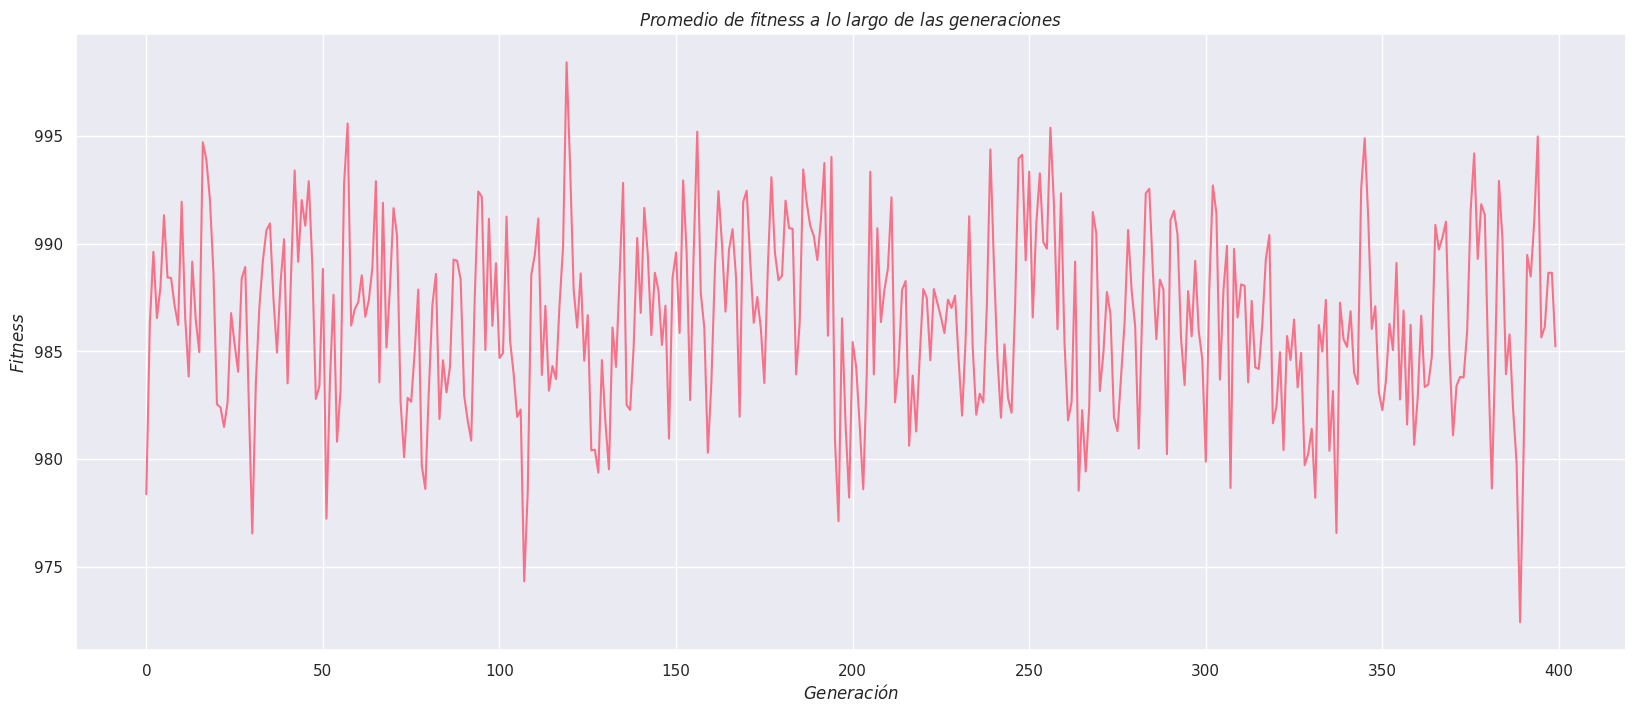

In [ ]:
population_1.mean_fitness()

**Histograma del fitness de la población**

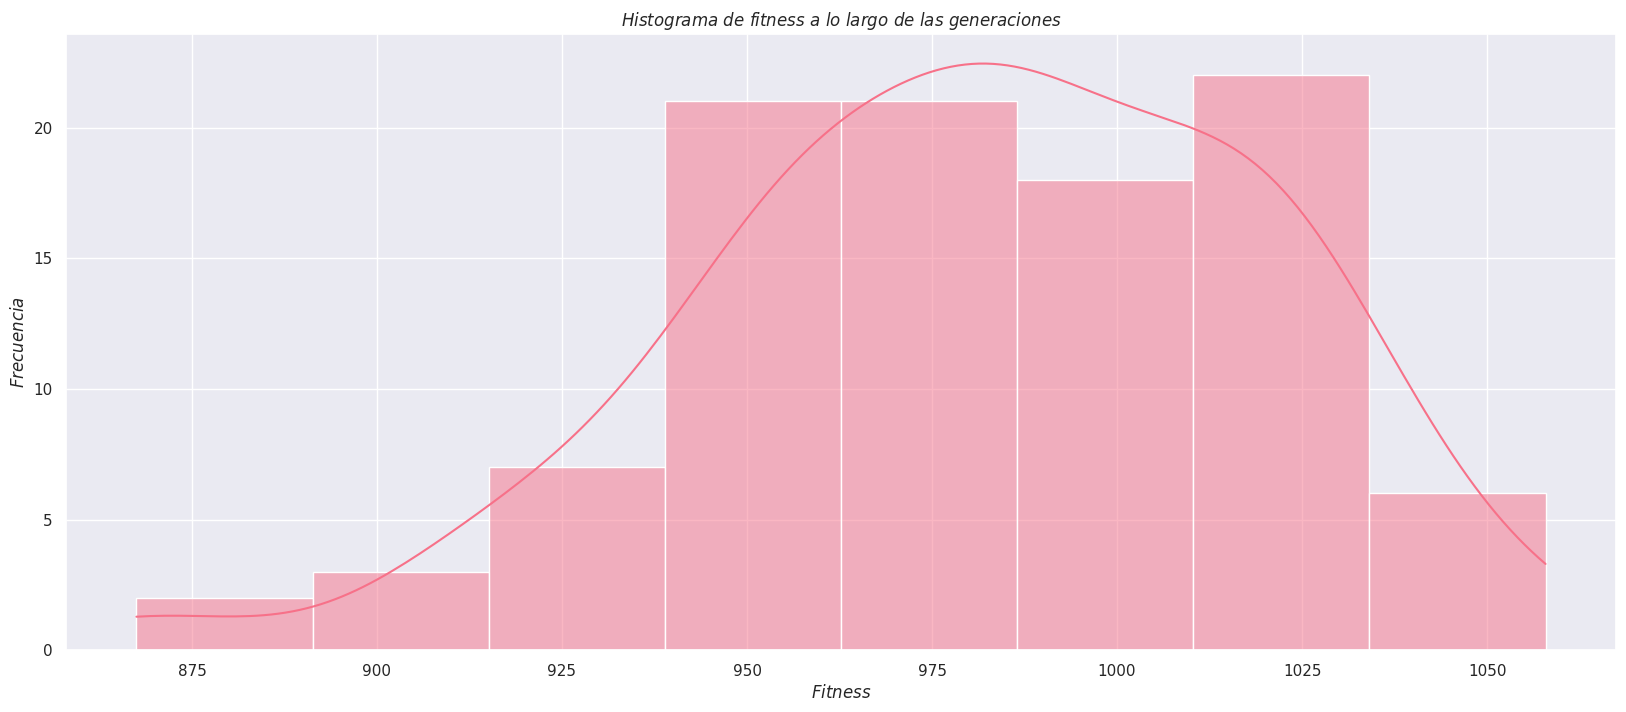

In [ ]:
population_1.hist_fitness()

**Diagrama de caja del fitness de una población**

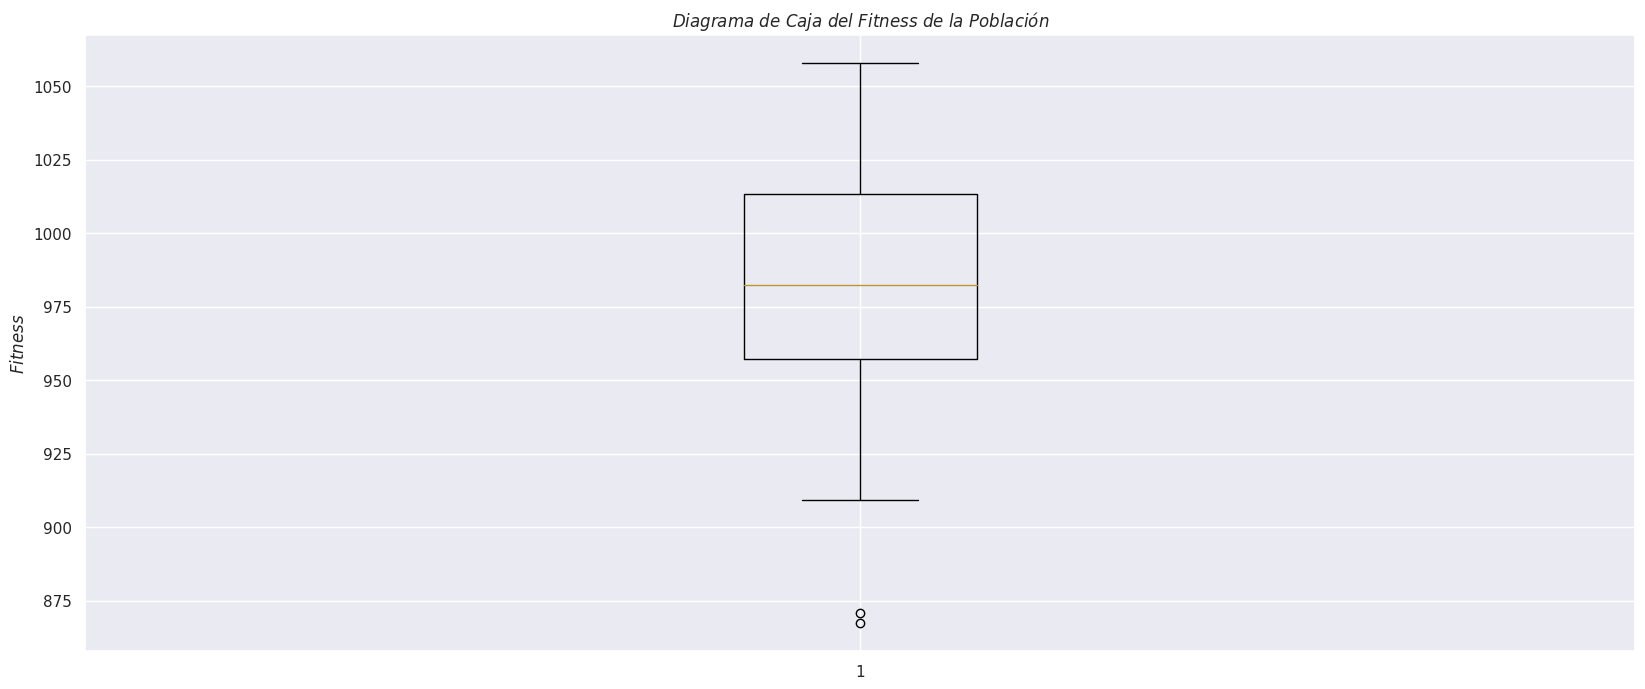

In [ ]:
population_1.boxplot()

**Fitness del mejor y peor individuo de la población**

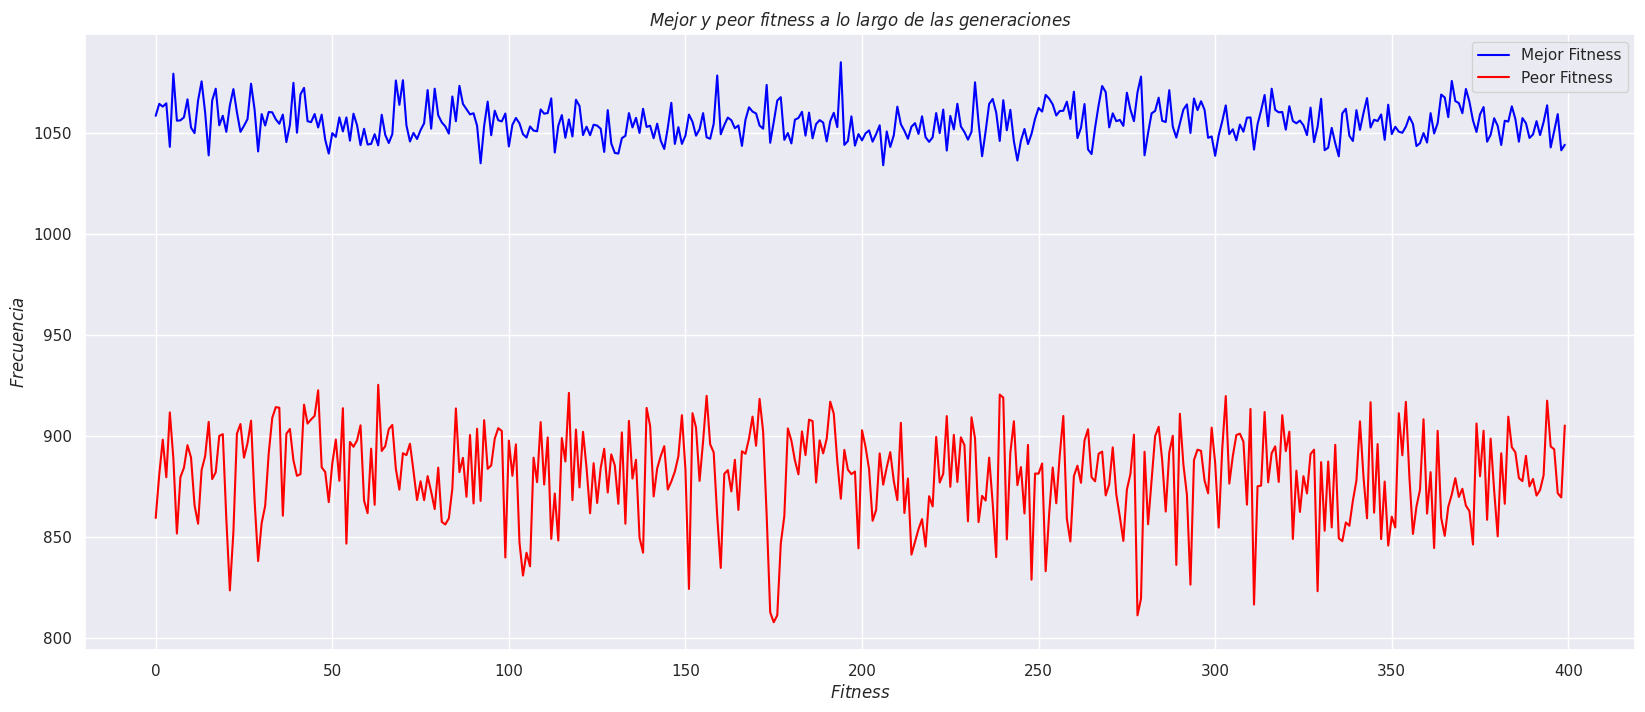

In [ ]:
population_1.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_1.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 981.8446666666669 ]

-> Mediana: [ 982.4000000000001 ]

-> Desviación standard: [ 37.744753342536086 ]

-> Máximo: [ 1057.9 ]

-> Mínimo: [ 867.5 ]


## **Experimento 2.**
***Selection = Ranking Based, Cross = Double , Mutation = Swap***

In [ ]:
population_2 = Population()
model_2 = GeneticAlgorithm(population_2, class_select='rb',
                           class_cross='double', class_mut='swap',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0,
                           fitness_func=fitness, max_gen=300)
best_ind2,best_fit2 = model_2.run()

  0%|          | 0/300 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

**Promedio de fitness a lo largo de las generaciones**

In [ ]:
population_2.mean_fitness()

**Histograma del fitness de la población**

In [ ]:
population_2.hist_fitness()

**Diagrama de caja del fitness de una población**

In [ ]:
population_2.boxplot()

**Fitness del mejor y peor individuo de la población**

In [ ]:
population_2.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_2.stats_describe()

## **Experimento 3.**
***Selection = Ruleta, Cross = Single , Mutation = Inversion***

In [ ]:
population_3 = Population()
model_3 = GeneticAlgorithm(population_3, class_select='rw',
                           class_cross='single', class_mut='inv',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0,
                           fitness_func=fitness, max_gen=300)
best_ind3,best_fit3 = model_3.run()

**Promedio de fitness a lo largo de las generaciones**

In [ ]:
population_3.mean_fitness()

**Histograma del fitness de la población**

In [ ]:
population_3.hist_fitness()

**Diagrama de caja del fitness de una población**

In [ ]:
population_3.boxplot()

**Fitness del mejor y peor individuo de la población**

In [ ]:
population_3.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_3.stats_describe()

# **Implementación de Robby el Robot - Con elitismo**
*Con 100 Individuos y 200 acciones.*
*Tablero de 100 celdas con una distribución promedio de 50 celdas.*

## **Experimento 1.**
***Selection = Tournament, Cross = Single , Mutation = Flip***

In [ ]:
population_4 = Population()
model_4 = GeneticAlgorithm(population_4, class_select='t',
                           class_cross='single', class_mut='flip',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0.5,
                           fitness_func=fitness, max_gen=1000)
best_ind4,best_fit4 = model_4.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

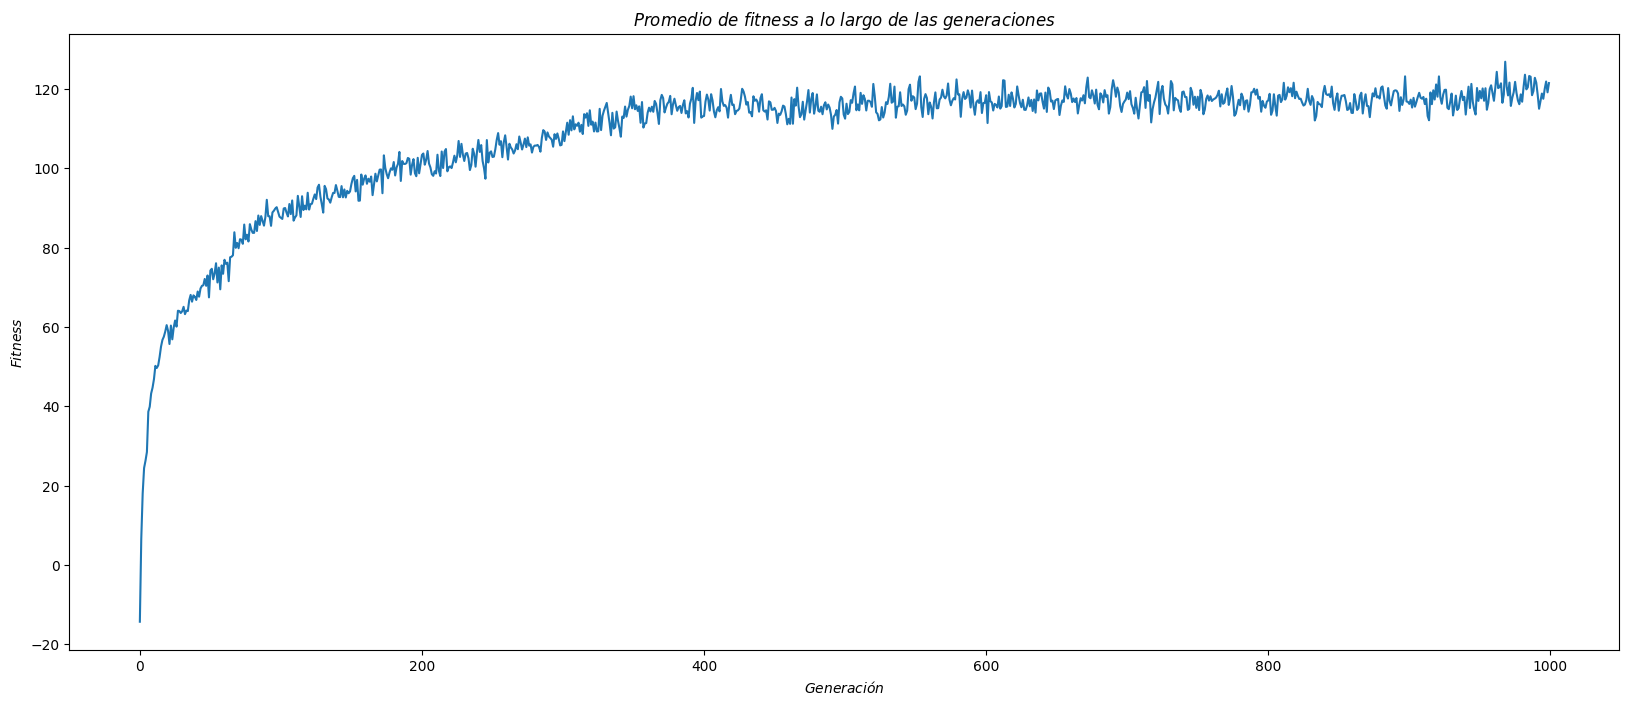

In [ ]:
population_4.mean_fitness()

**Histograma del fitness de la población**

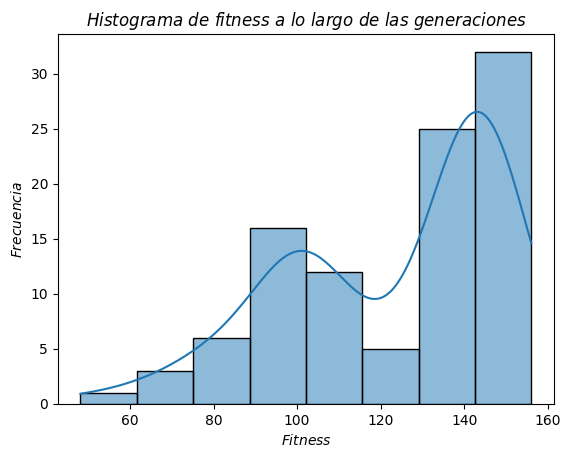

In [ ]:
population_4.hist_fitness()

**Diagrama de caja del fitness de una población**

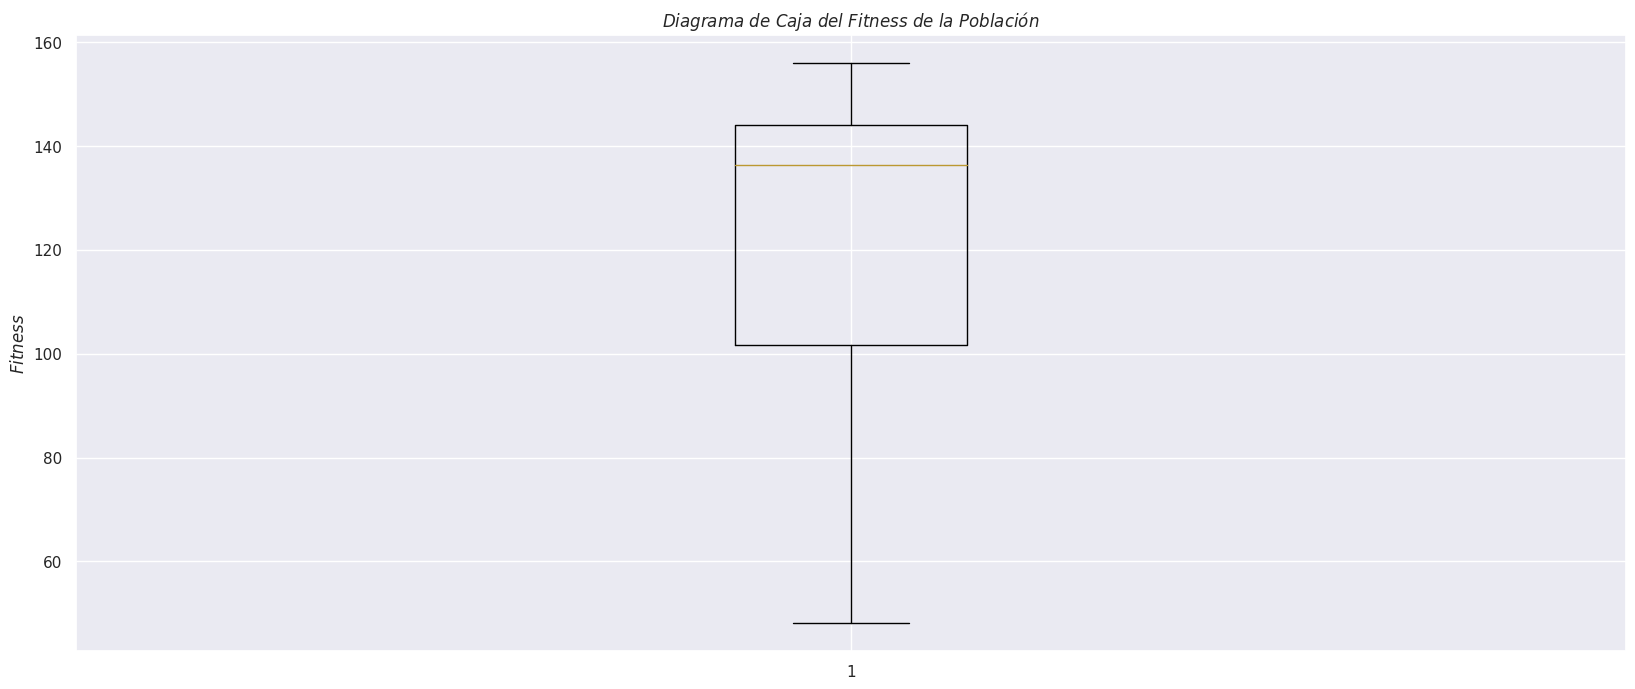

In [ ]:
population_4.boxplot()

**Fitness del mejor y peor individuo de la población**

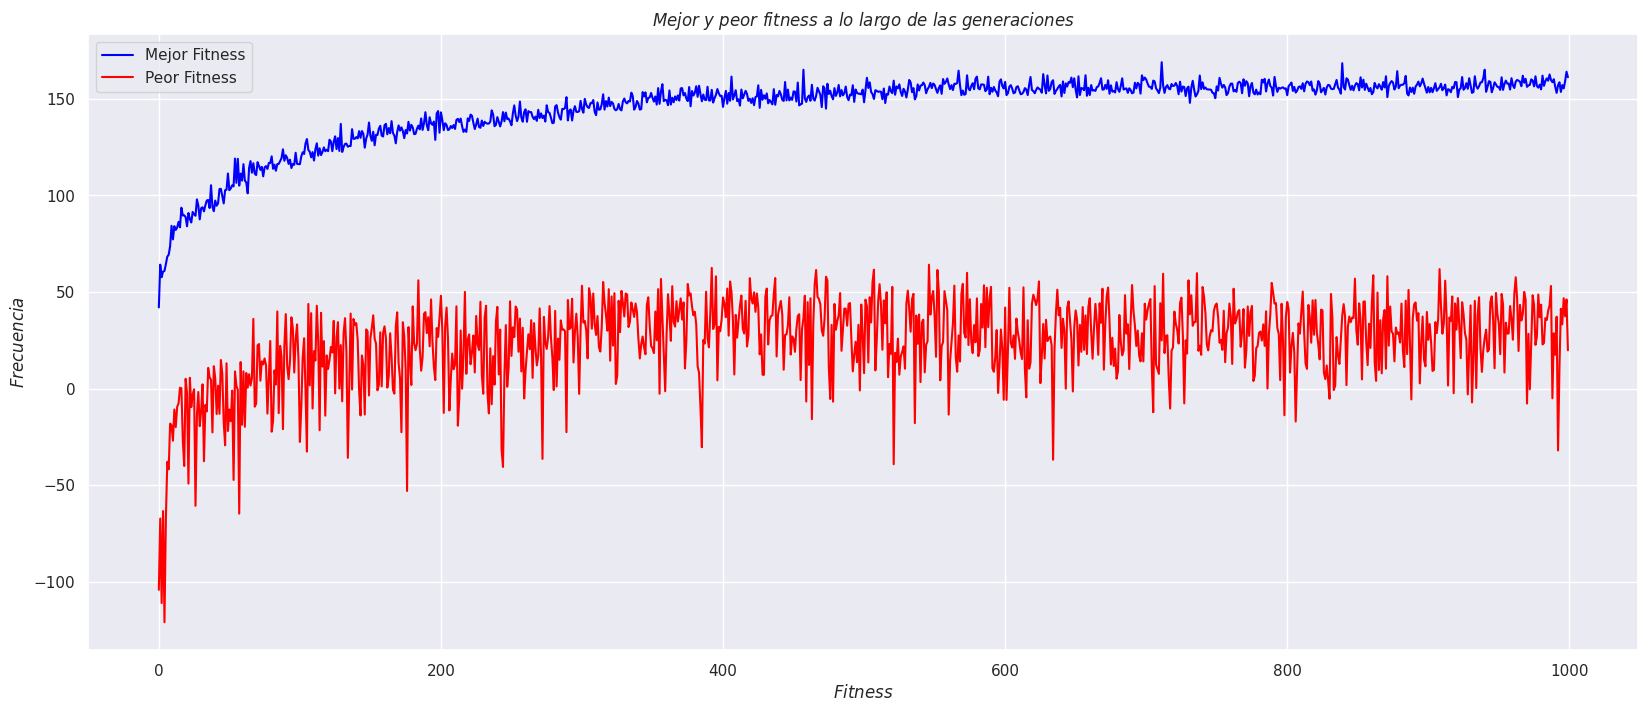

In [ ]:
population_4.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_4.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 123.35933333333334 ]

-> Mediana: [ 136.38333333333333 ]

-> Desviación standard: [ 25.59038255977342 ]

-> Máximo: [ 156.03333333333333 ]

-> Mínimo: [ 48.166666666666664 ]


## **Experimento 2.**
***Selection = Ranking Based, Cross = Double , Mutation = Swap***

In [ ]:
population_5 = Population()
model_5 = GeneticAlgorithm(population_5, class_select='rb',
                           class_cross='double', class_mut='swap',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0.5,
                           fitness_func=fitness, max_gen=1000)
best_ind5,best_fit5 = model_5.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

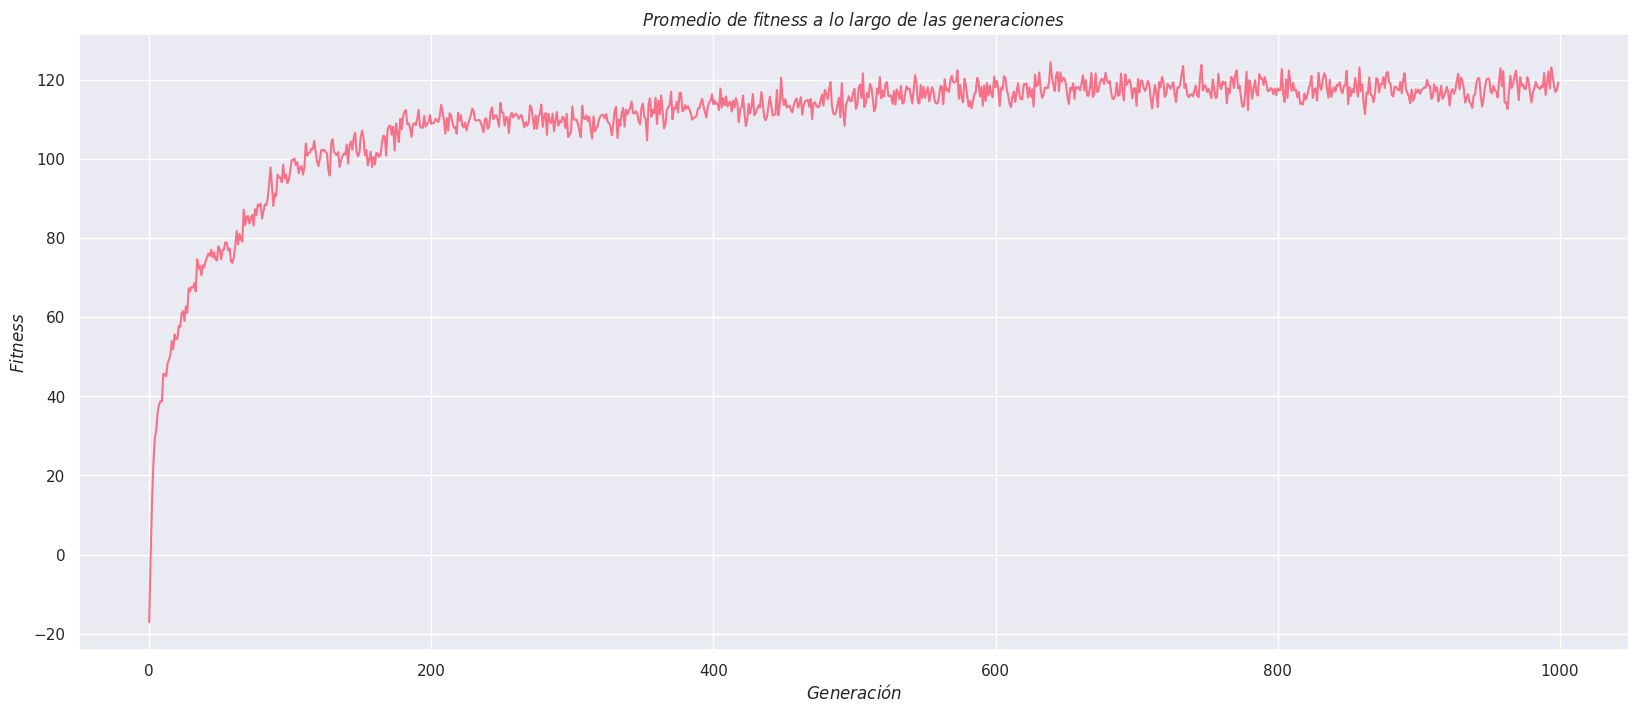

In [ ]:
population_5.mean_fitness()

**Histograma del fitness de la población**

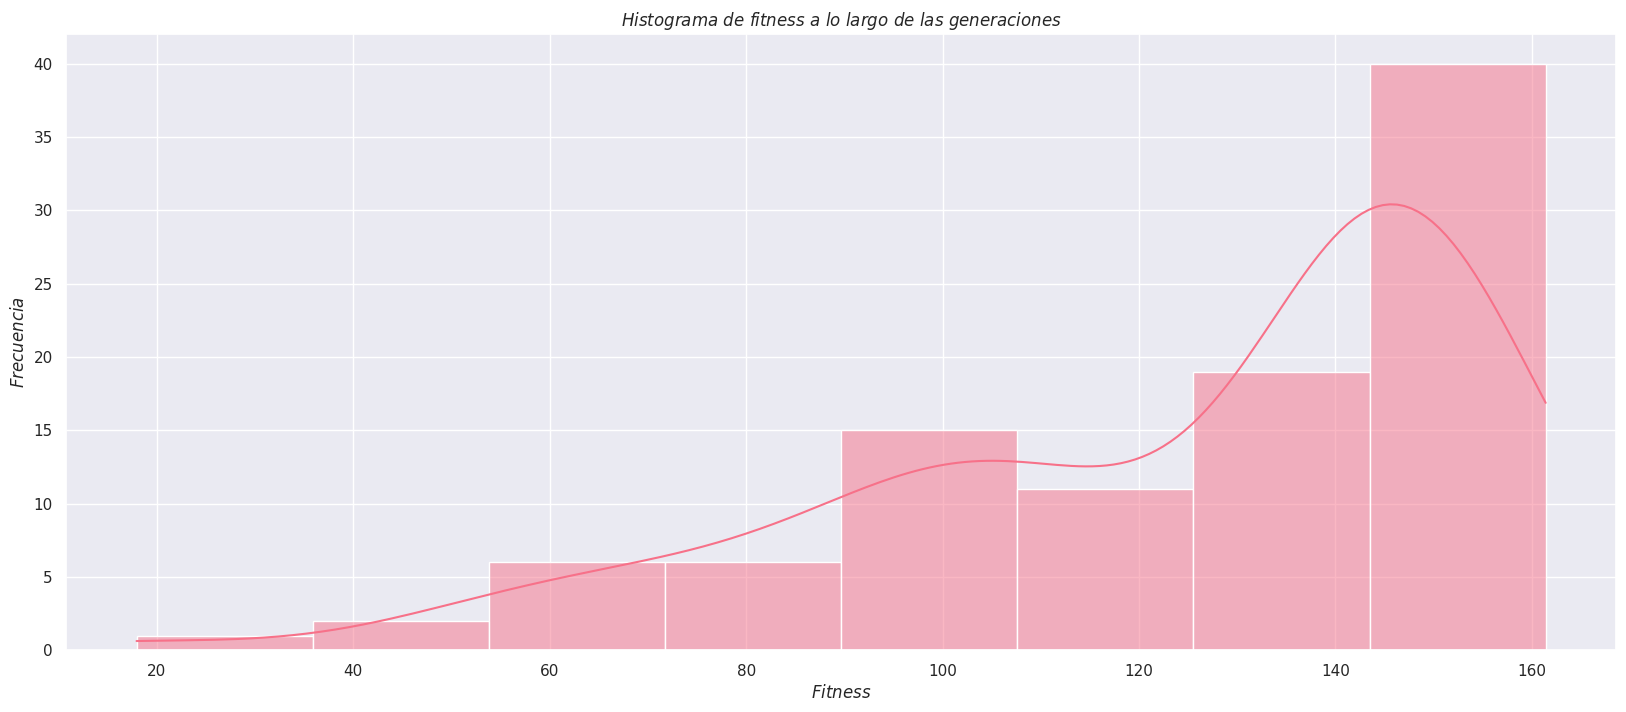

In [ ]:
population_5.hist_fitness()

**Diagrama de caja del fitness de una población**

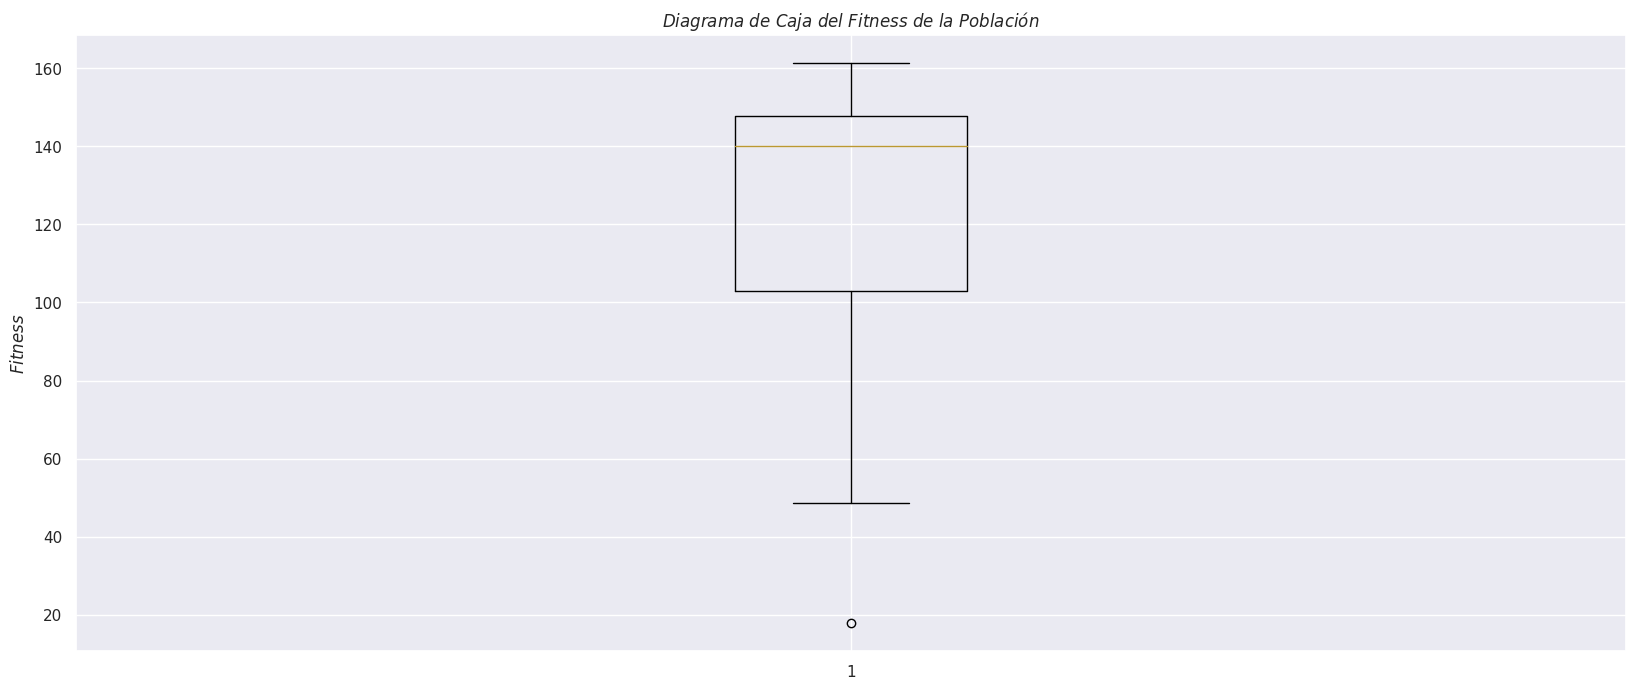

In [ ]:
population_5.boxplot()

**Fitness del mejor y peor individuo de la población**

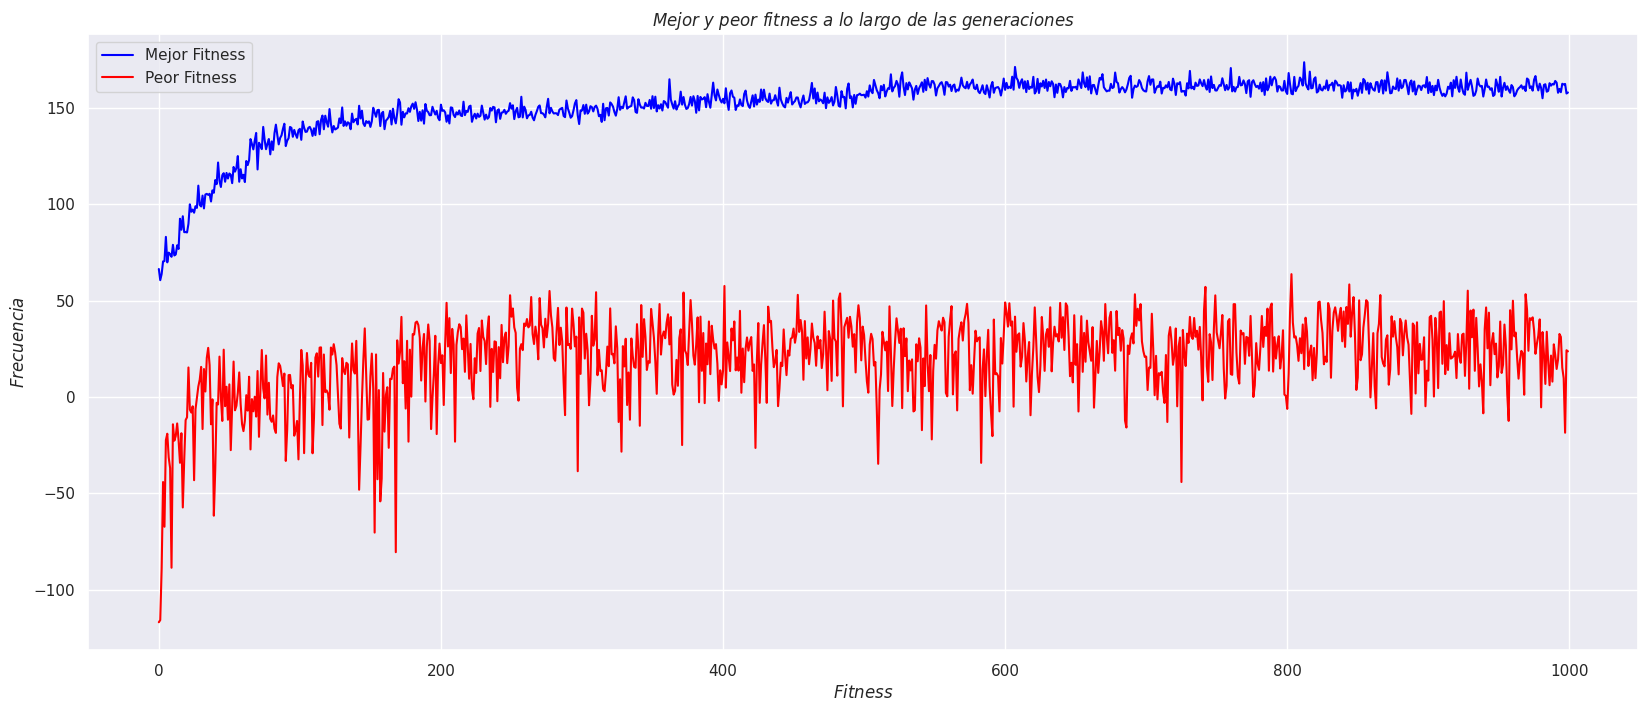

In [ ]:
population_5.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_5.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 123.81099999999998 ]

-> Mediana: [ 140.18333333333334 ]

-> Desviación standard: [ 31.20683830152901 ]

-> Máximo: [ 161.4 ]

-> Mínimo: [ 17.933333333333334 ]


## **Experimento 3.**
***Selection = Ruleta, Cross = Single , Mutation = Inversion***

In [ ]:
population_6 = Population()
model_6 = GeneticAlgorithm(population_6, class_select='t',
                           class_cross='single', class_mut='inversion',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0.5,
                           fitness_func=fitness, max_gen=1000)
best_ind6,best_fit6 = model_6.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

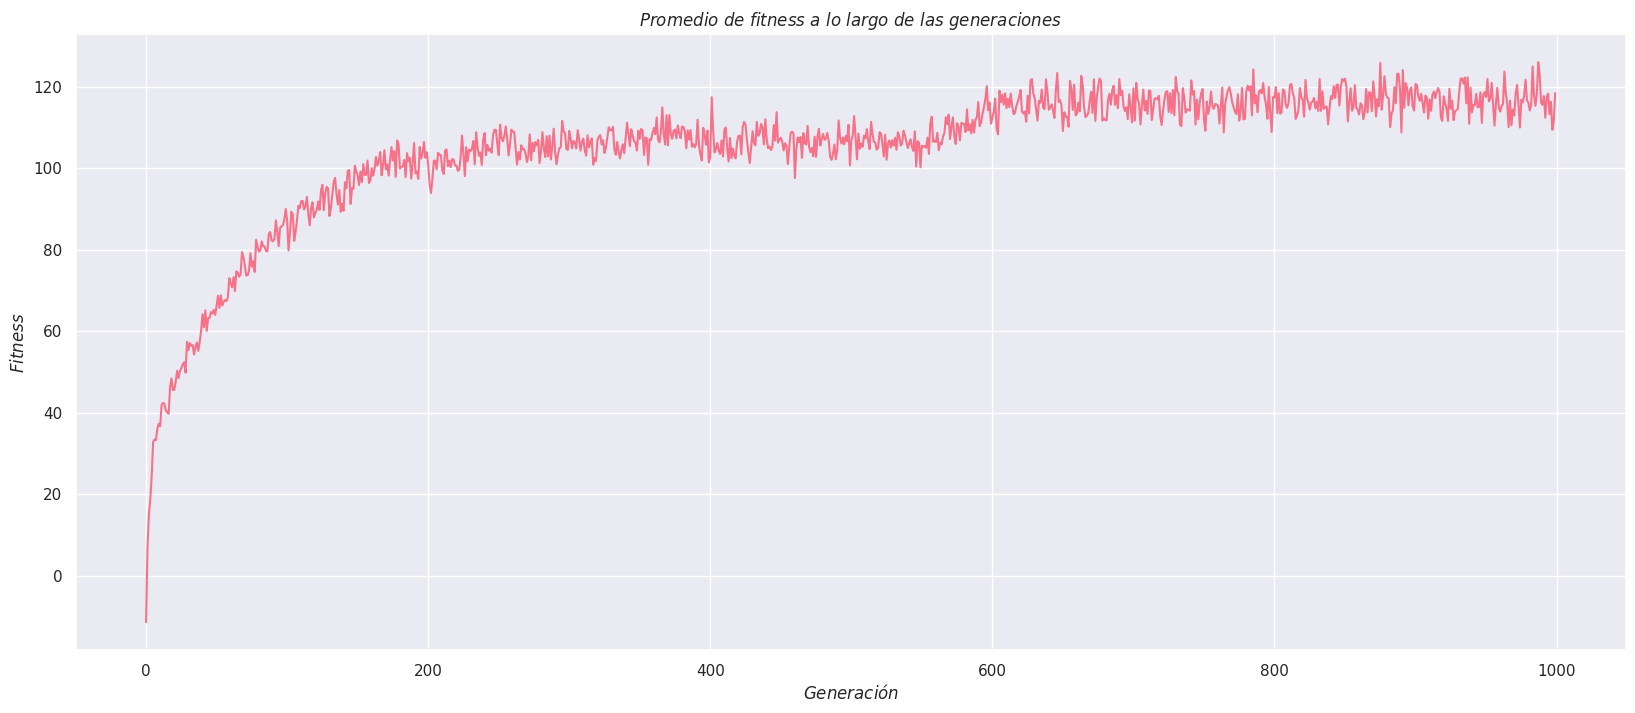

In [ ]:
population_6.mean_fitness()

**Histograma del fitness de la población**

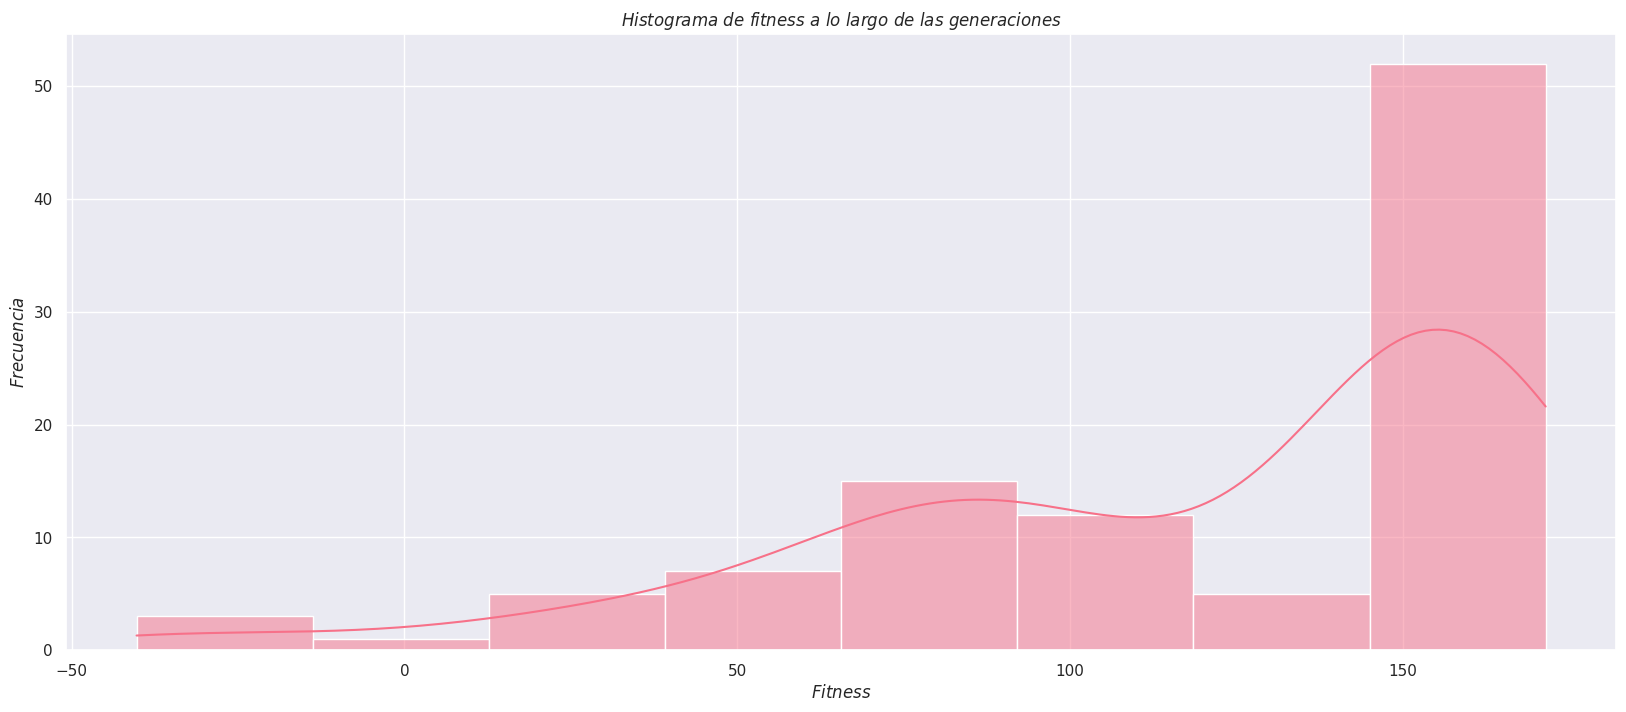

In [ ]:
population_6.hist_fitness()

**Diagrama de caja del fitness de una población**

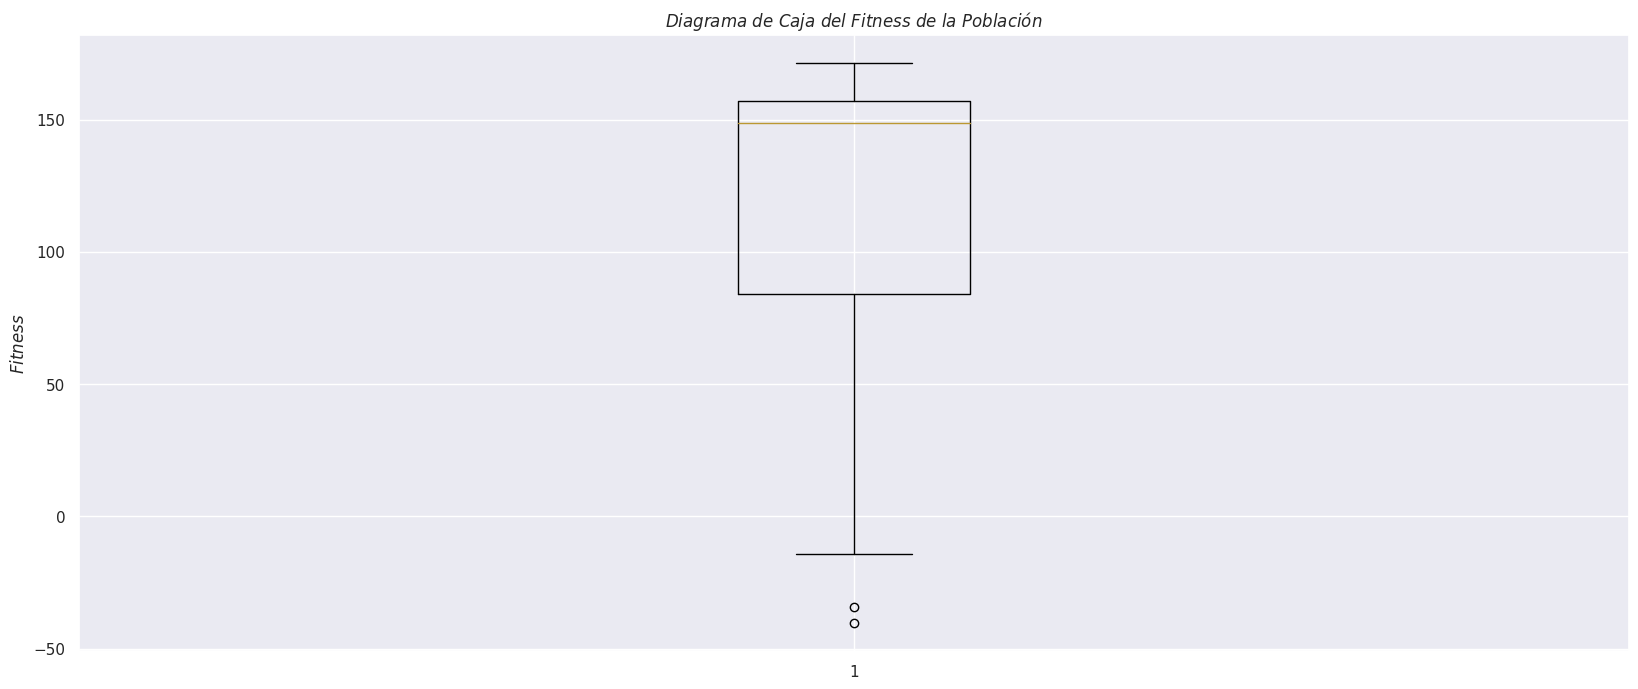

In [ ]:
population_6.boxplot()

**Fitness del mejor y peor individuo de la población**

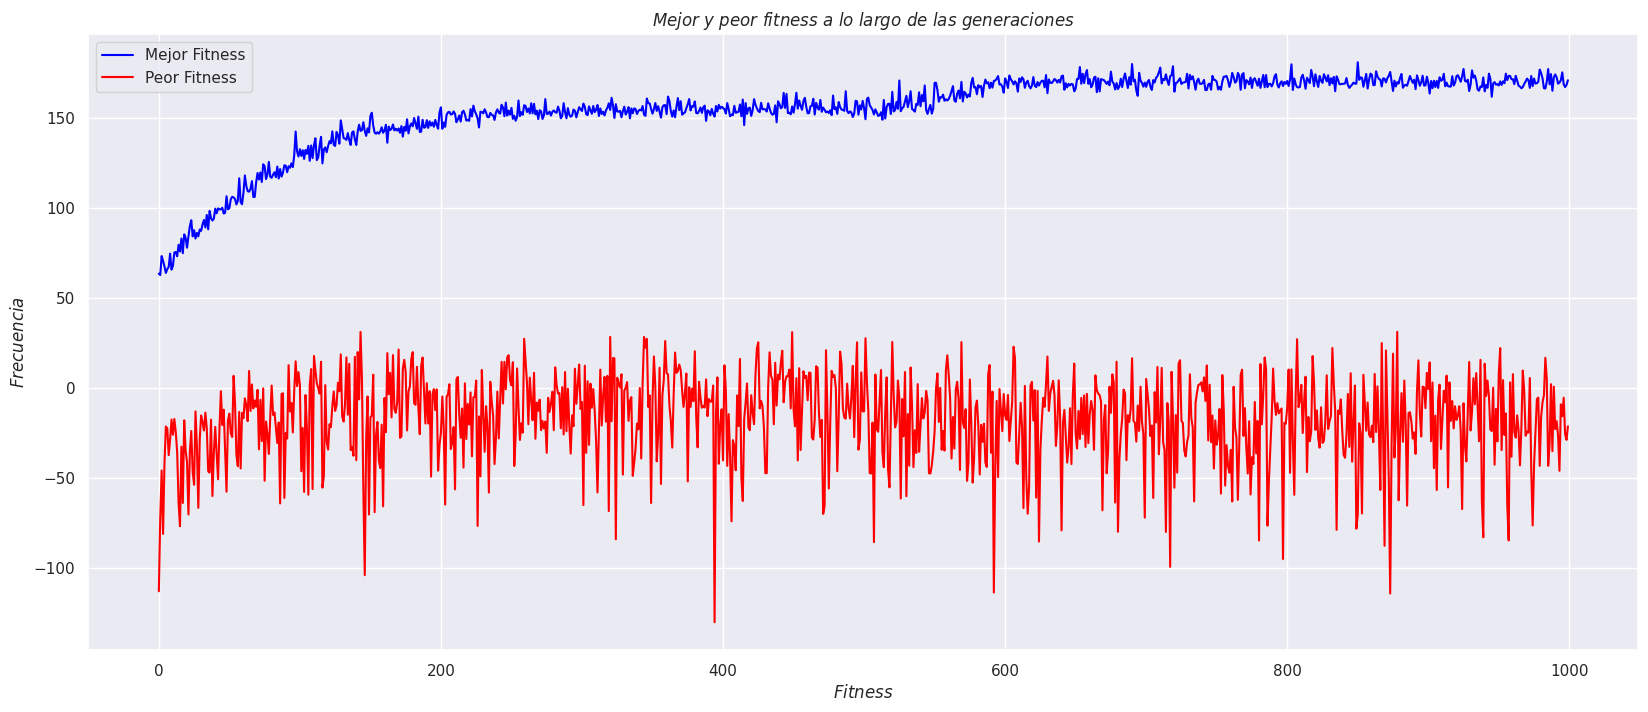

In [ ]:
population_6.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_6.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 118.40366666666667 ]

-> Mediana: [ 148.66666666666669 ]

-> Desviación standard: [ 49.929042515910076 ]

-> Máximo: [ 171.46666666666667 ]

-> Mínimo: [ -40.233333333333334 ]


# **Implementación de Robby el Robot - Sin elitismo, acciones reducidas**
*Con 100 Individuos y 100 acciones.*
*Tablero de 100 celdas con una distribución promedio de 50 celdas.*

## **Experimento 1.**
***Selection = Tournament, Cross = Single , Mutation = Flip***

In [ ]:
population_10 = Population(size=100)
model_10 = GeneticAlgorithm(population_10, class_select='t',
                           class_cross='single', class_mut='flip',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0,
                           fitness_func=fitness, max_gen=1000)
best_ind10,best_fit10 = model_10.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

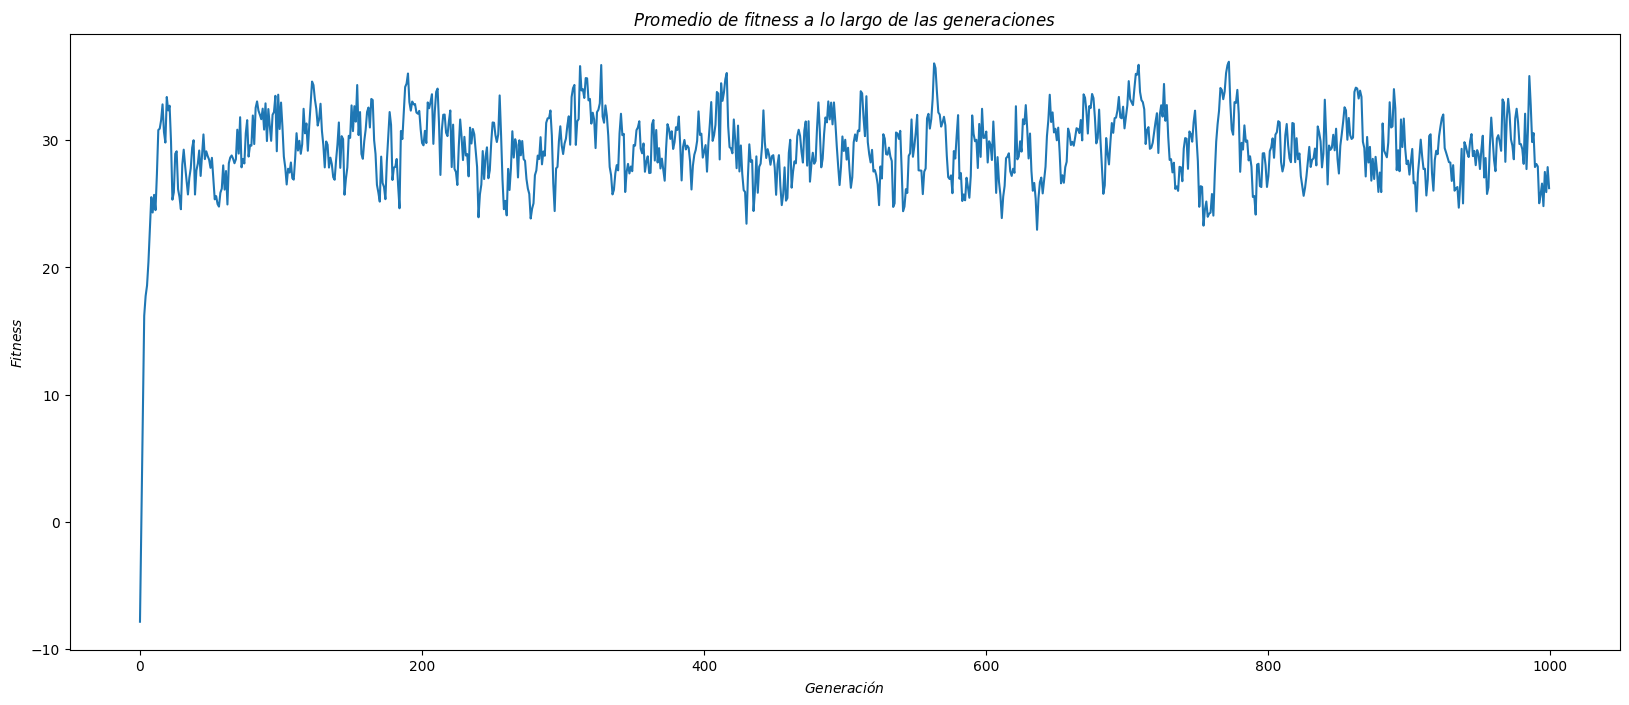

In [ ]:
population_10.mean_fitness()

**Histograma del fitness de la población**

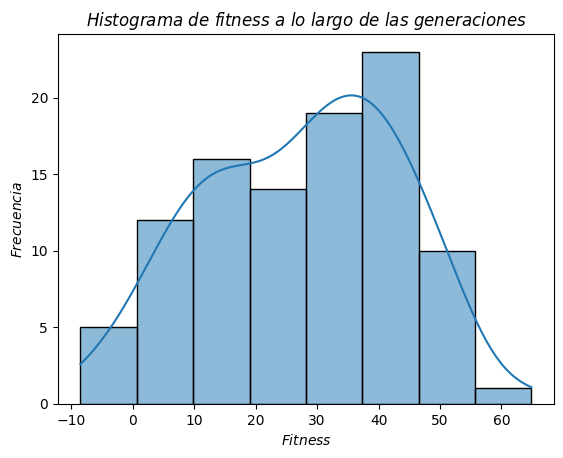

In [ ]:
population_10.hist_fitness()

**Diagrama de caja del fitness de una población**

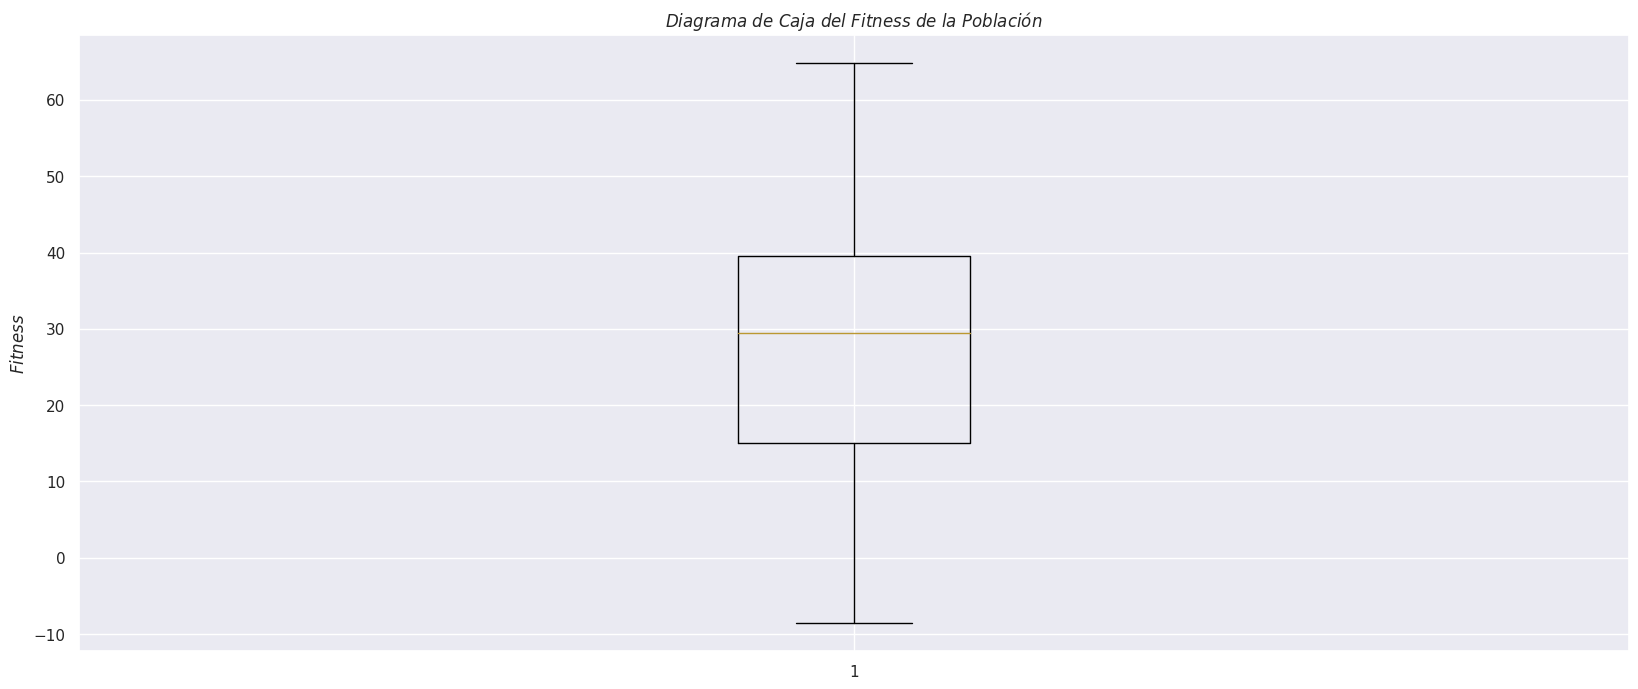

In [ ]:
population_10.boxplot()

**Fitness del mejor y peor individuo de la población**

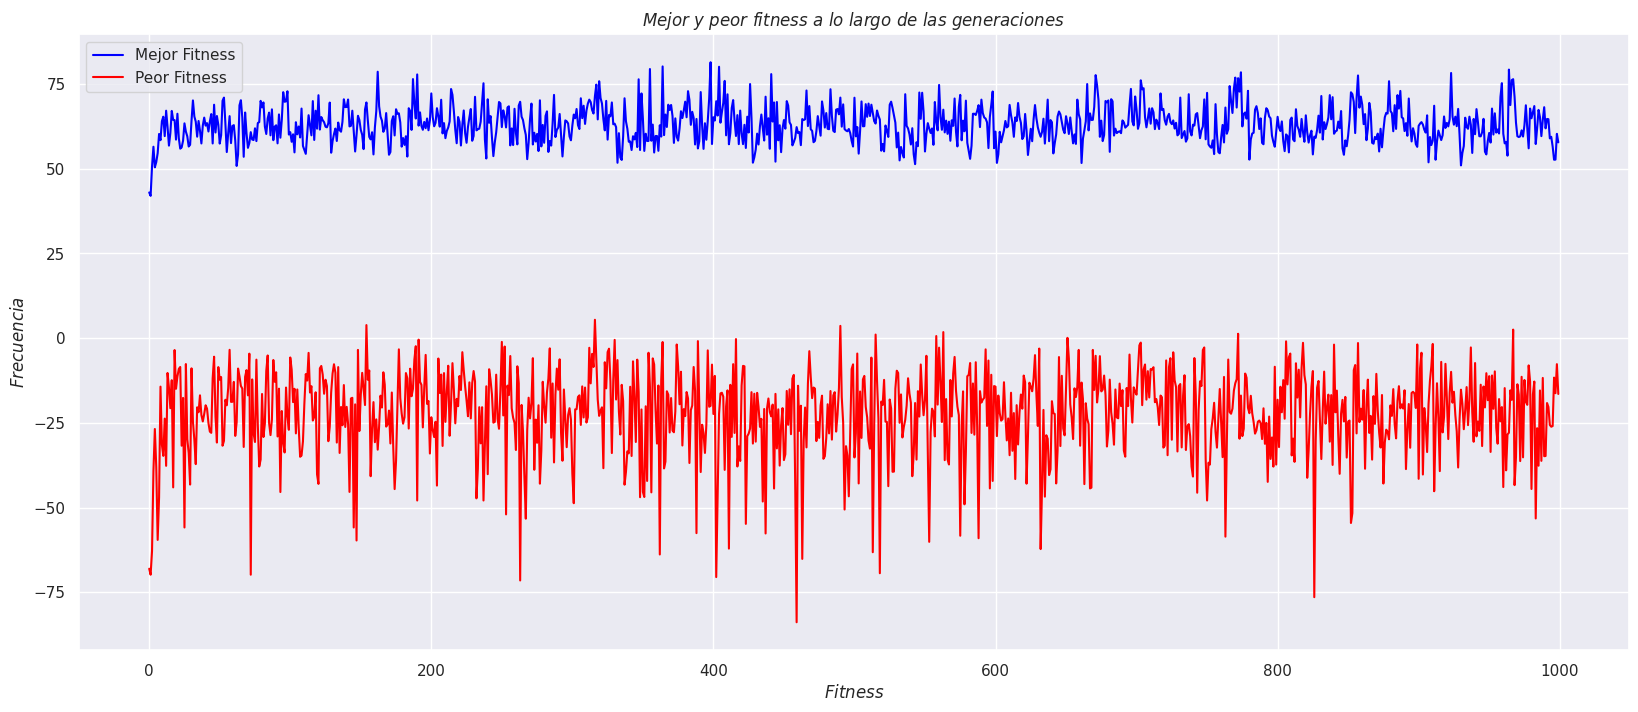

In [ ]:
population_10.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_10.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 27.428333333333335 ]

-> Mediana: [ 29.4 ]

-> Desviación standard: [ 15.78522260779929 ]

-> Máximo: [ 64.86666666666666 ]

-> Mínimo: [ -8.533333333333333 ]


## **Experimento 2.**
***Selection = Ranking Based, Cross = Double , Mutation = Swap***

In [ ]:
population_11 = Population(size=100)
model_11 = GeneticAlgorithm(population_11, class_select='rb',
                           class_cross='double', class_mut='swap',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0,
                           fitness_func=fitness, max_gen=1000)
best_ind11,best_fit11 = model_11.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

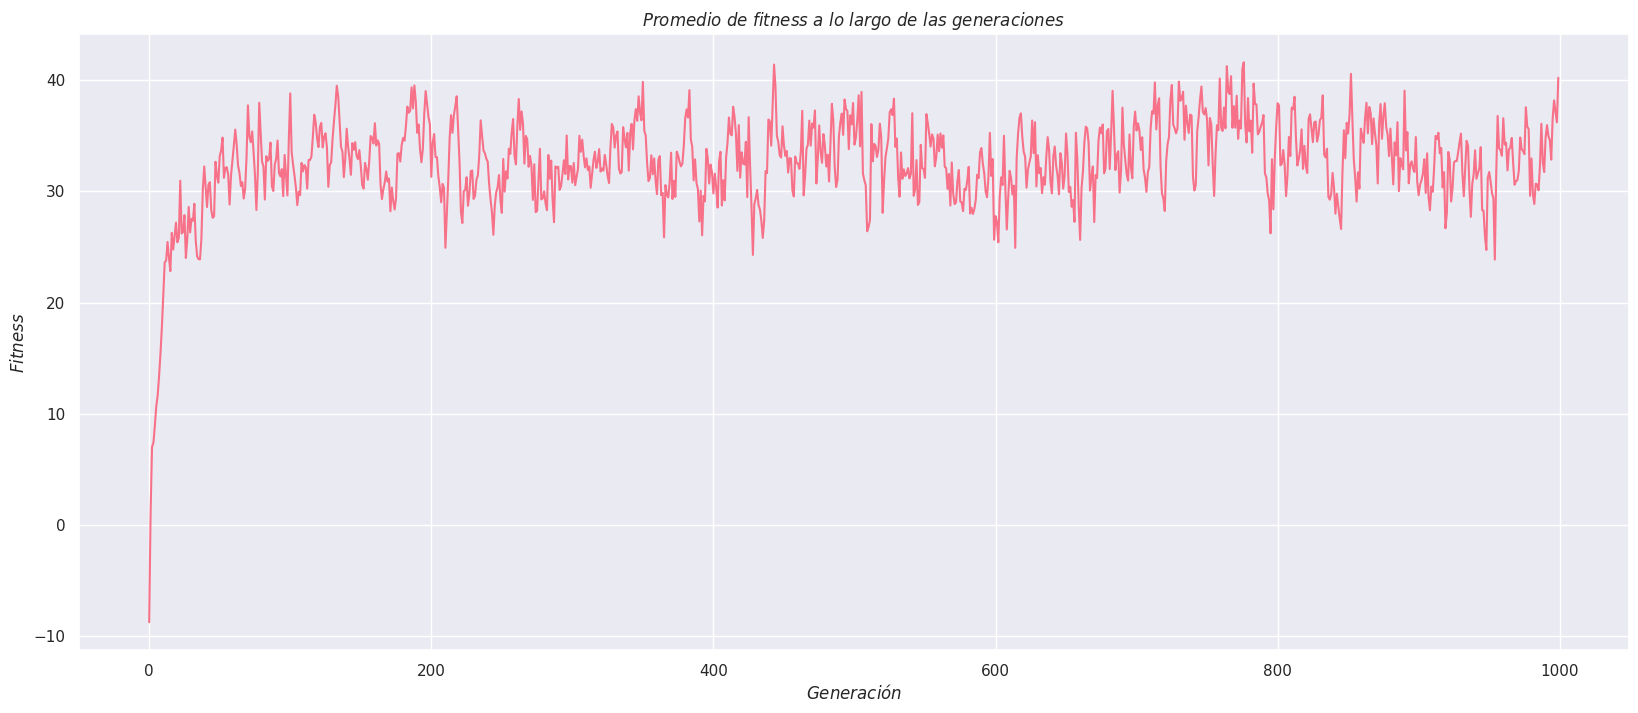

In [ ]:
population_11.mean_fitness()

**Histograma del fitness de la población**

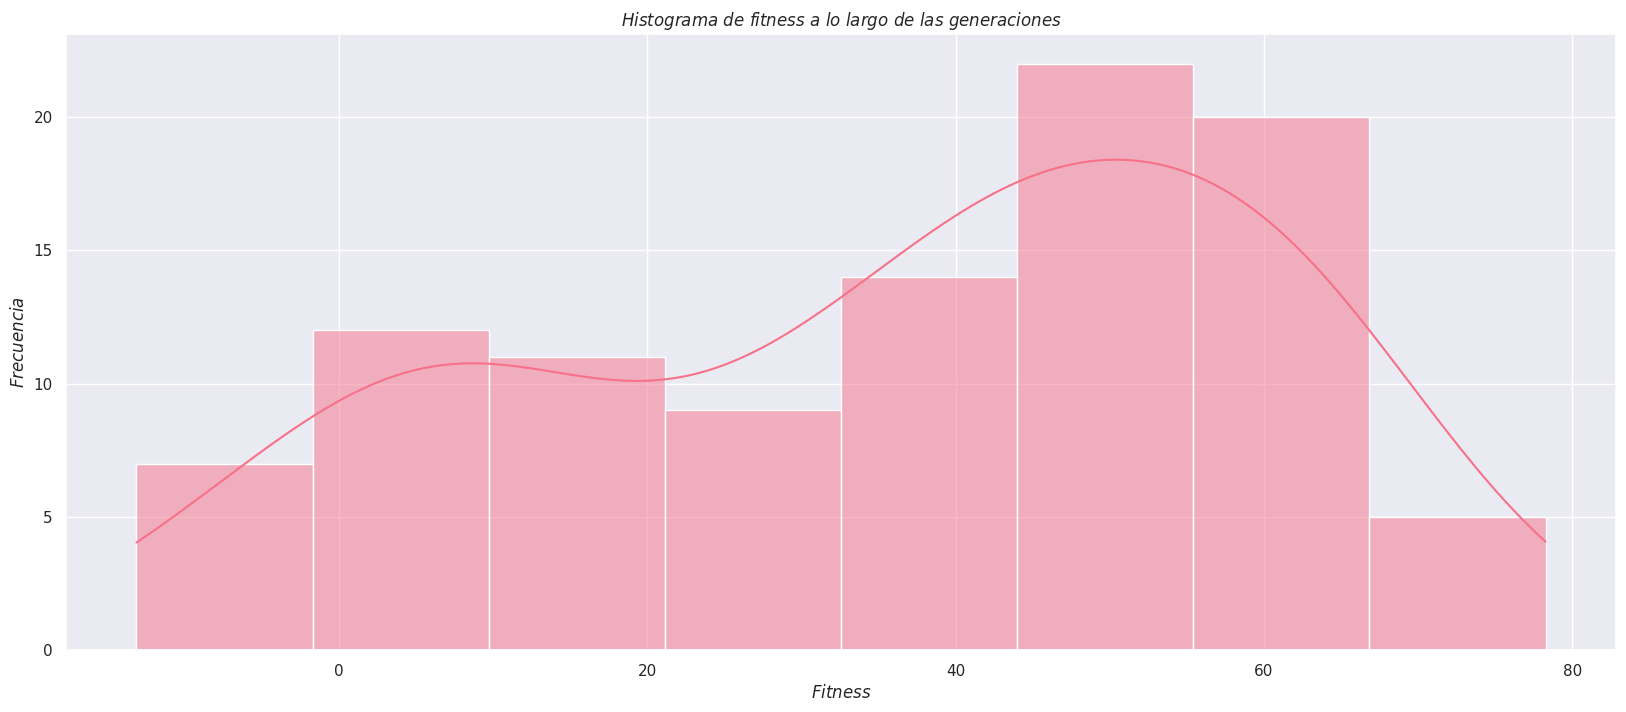

In [ ]:
population_11.hist_fitness()

**Diagrama de caja del fitness de una población**

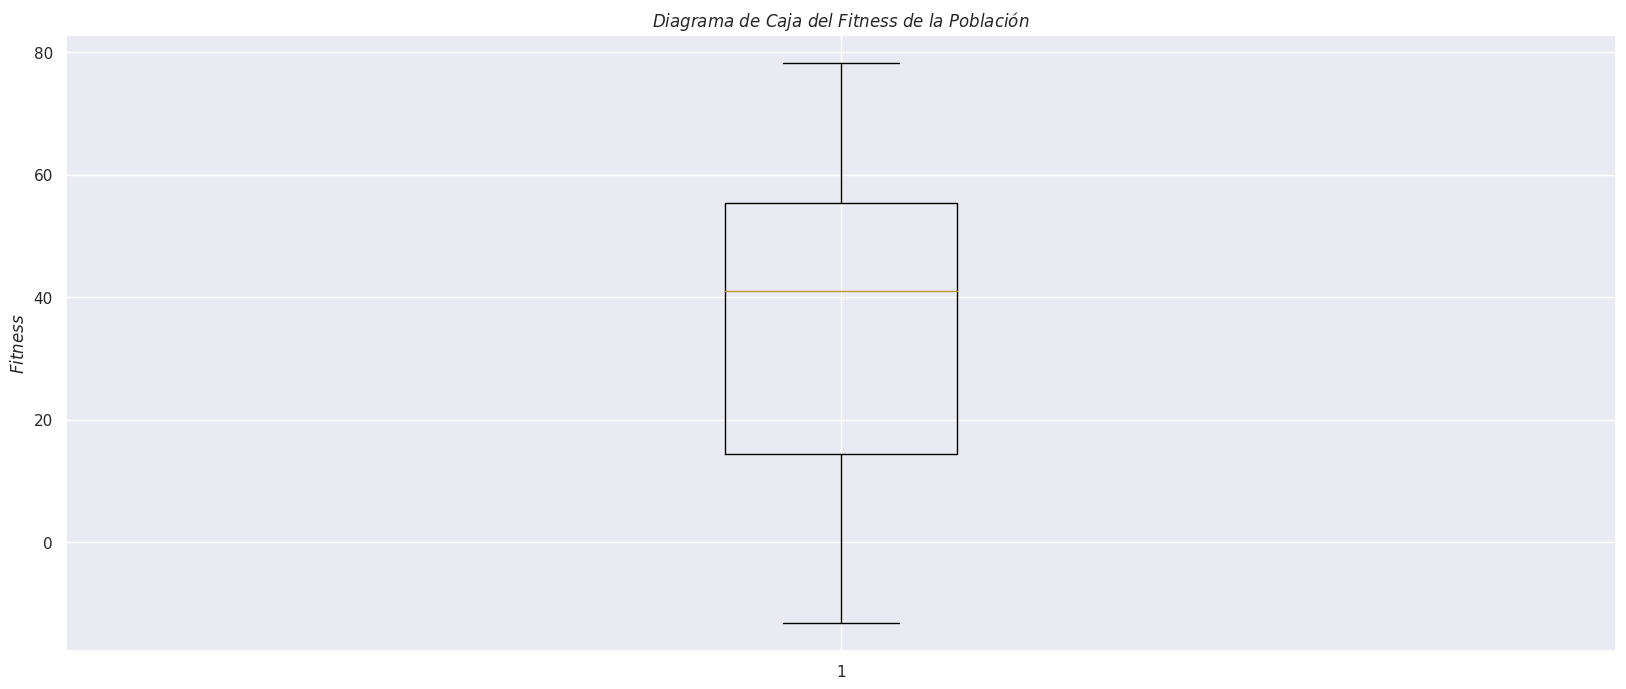

In [ ]:
population_11.boxplot()

**Fitness del mejor y peor individuo de la población**

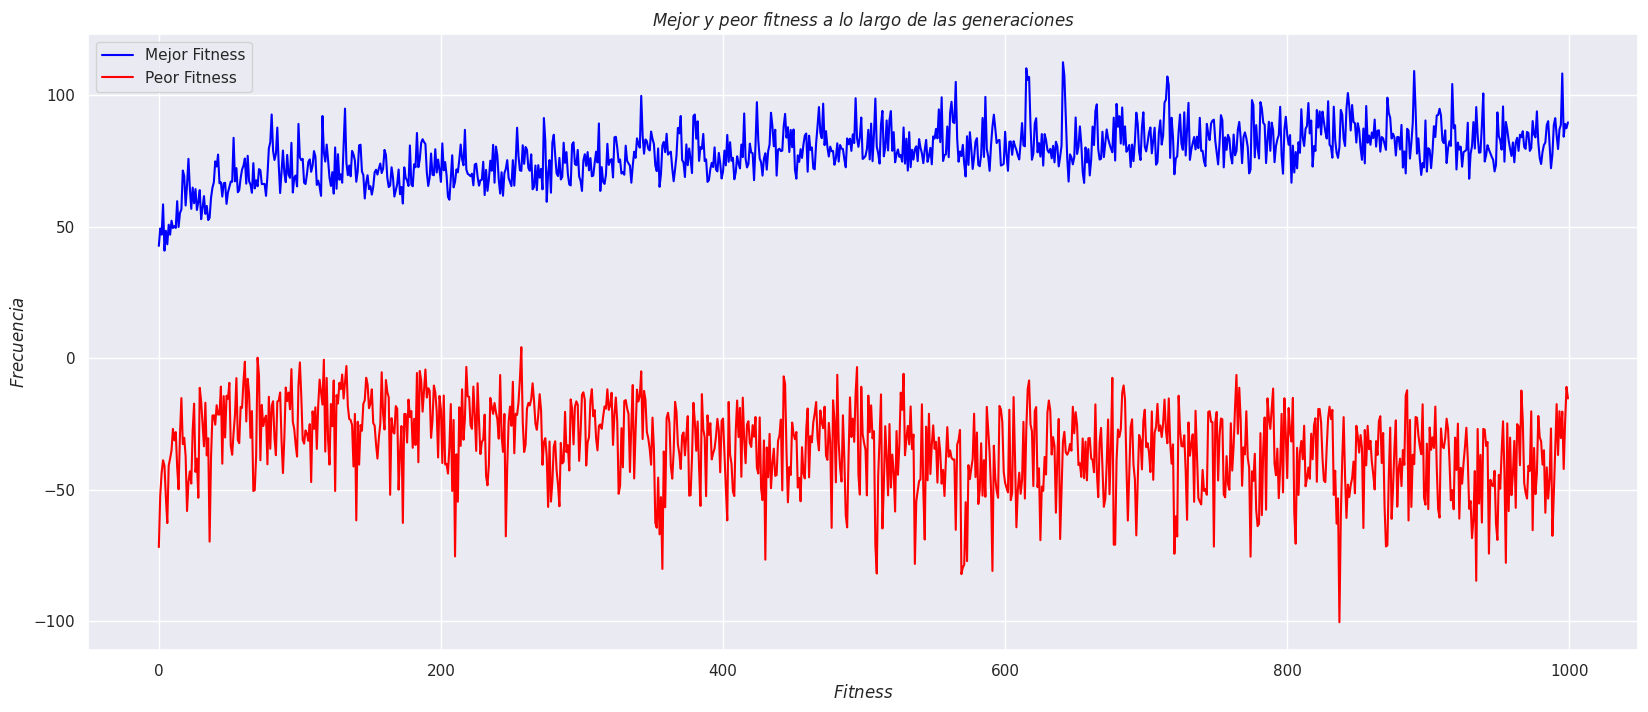

In [ ]:
population_11.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_11.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 35.996333333333325 ]

-> Mediana: [ 41.05 ]

-> Desviación standard: [ 23.509664157060556 ]

-> Máximo: [ 78.26666666666667 ]

-> Mínimo: [ -13.133333333333333 ]


## **Experimento 3.**
***Selection = Tournament, Cross = Single , Mutation = Inversion***

In [ ]:
population_12 = Population(size=100)
model_12 = GeneticAlgorithm(population_12, class_select='t',
                           class_cross='single', class_mut='inv',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0,
                           fitness_func=fitness, max_gen=1000)
best_ind12,best_fit12 = model_12.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

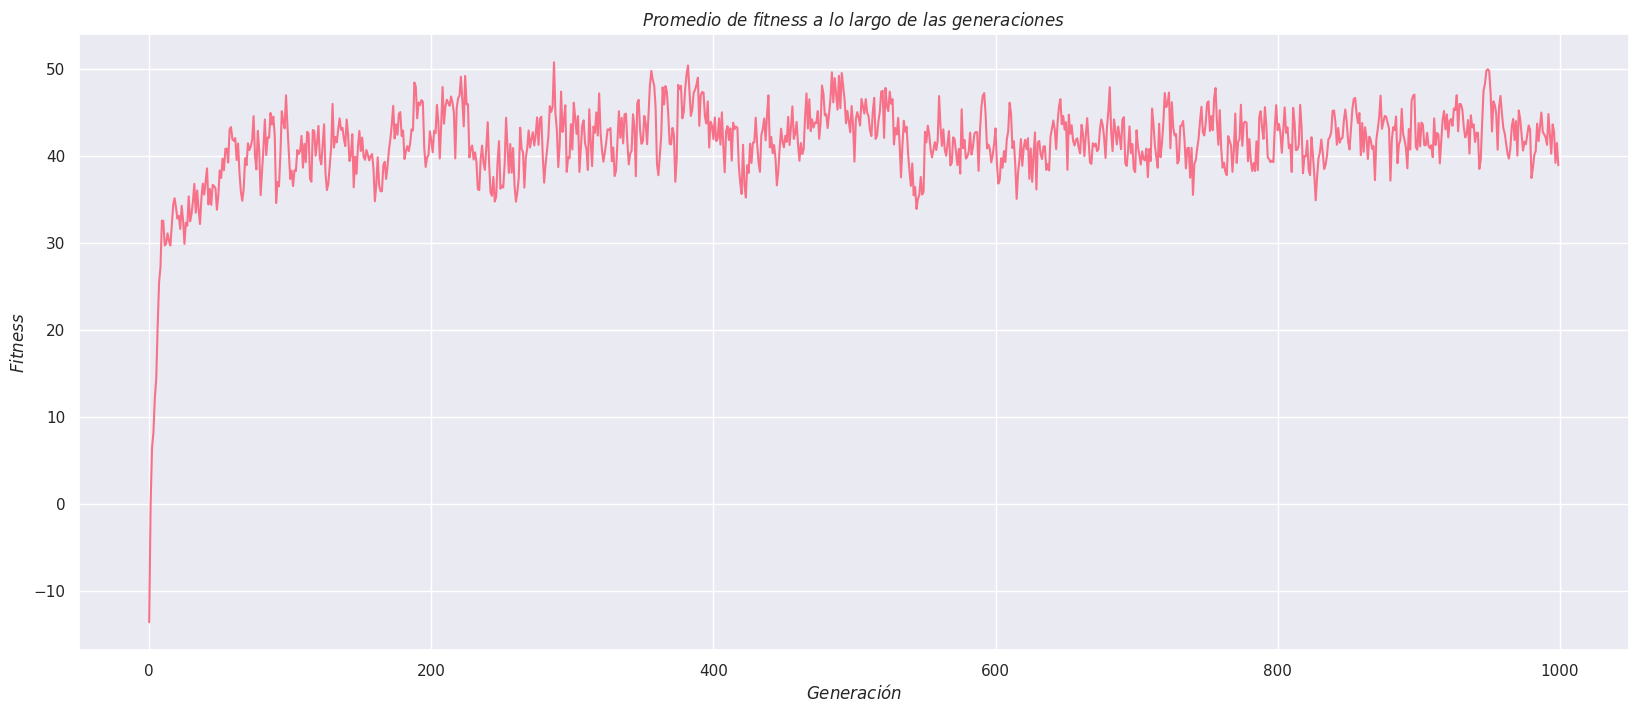

In [ ]:
population_12.mean_fitness()

**Histograma del fitness de la población**

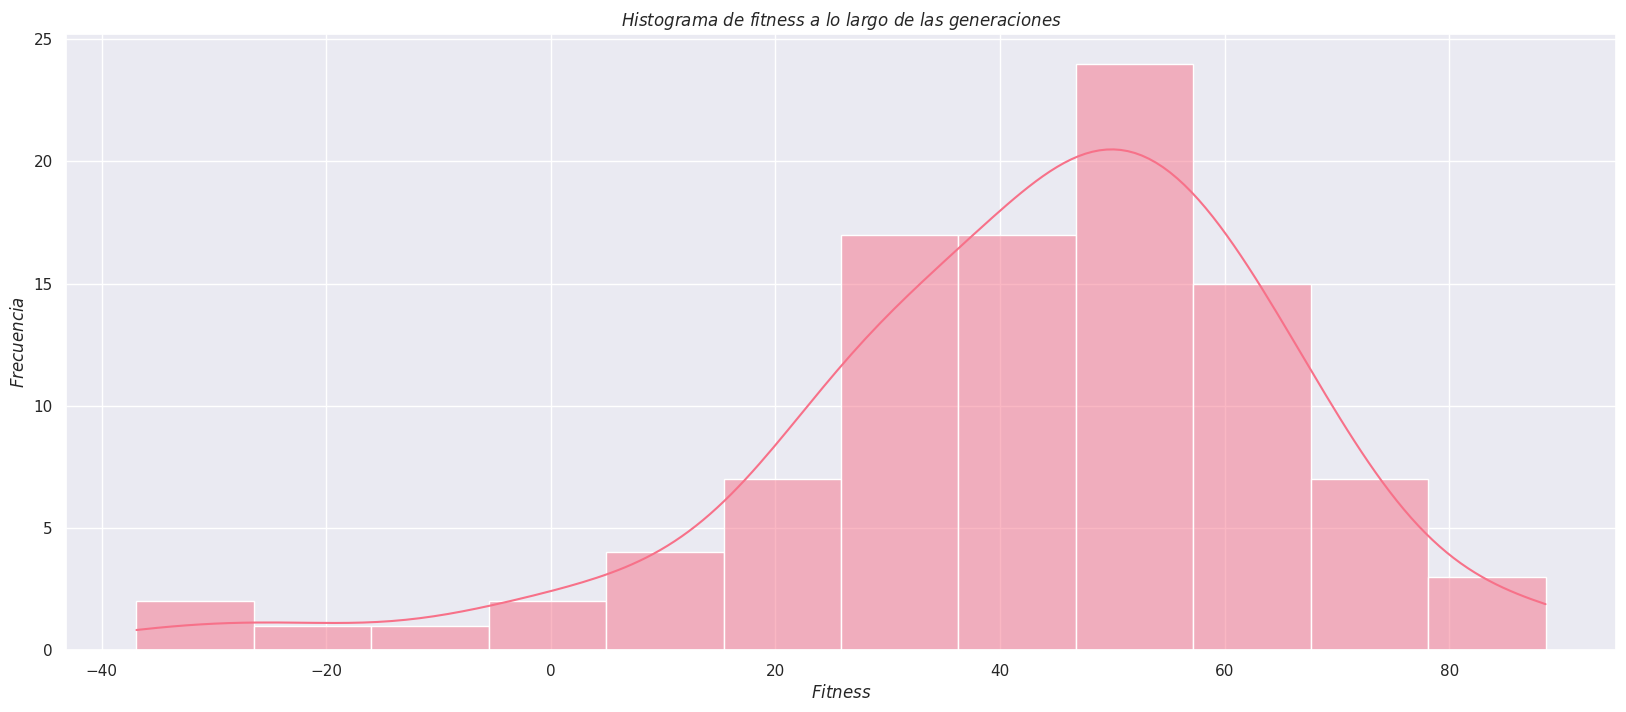

In [ ]:
population_12.hist_fitness()

**Diagrama de caja del fitness de una población**

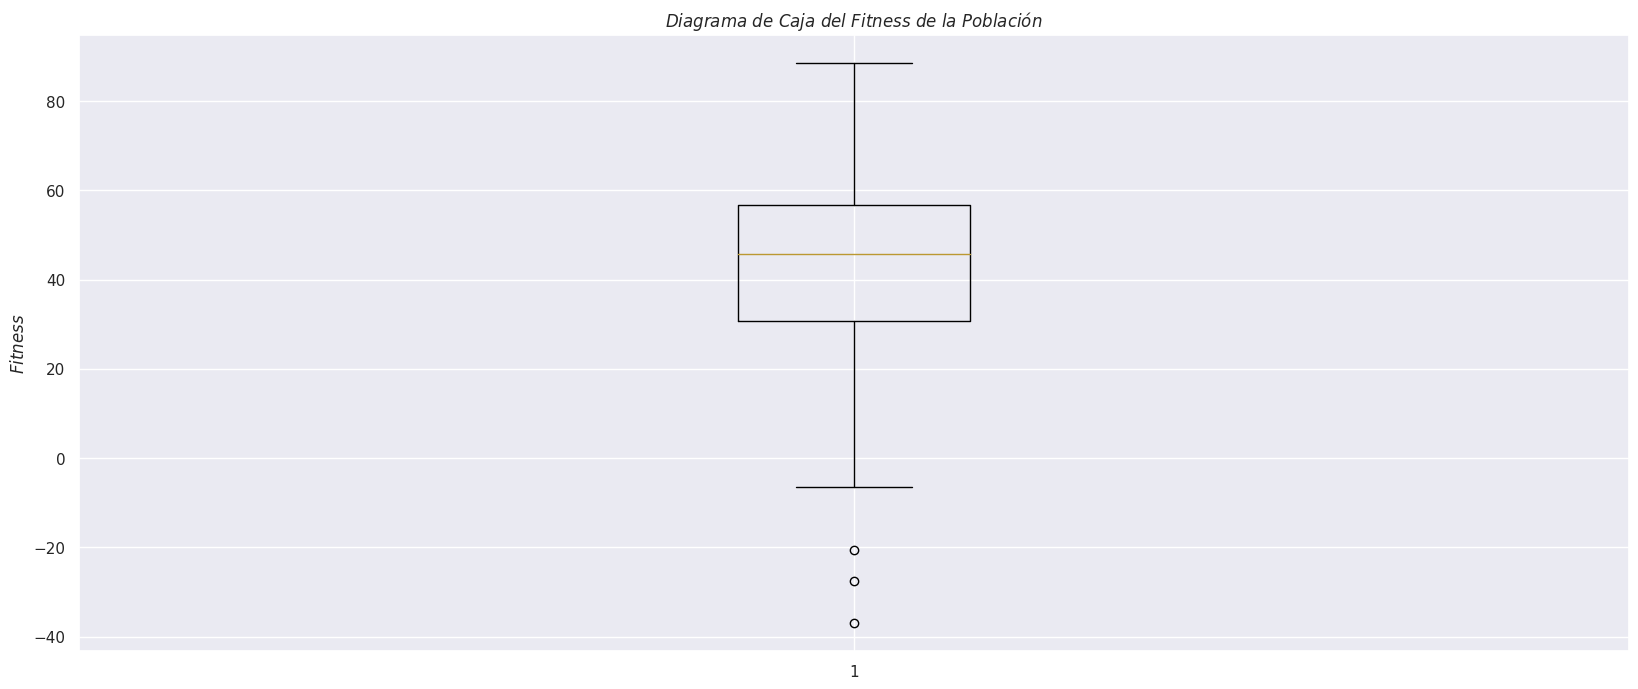

In [ ]:
population_12.boxplot()

**Fitness del mejor y peor individuo de la población**

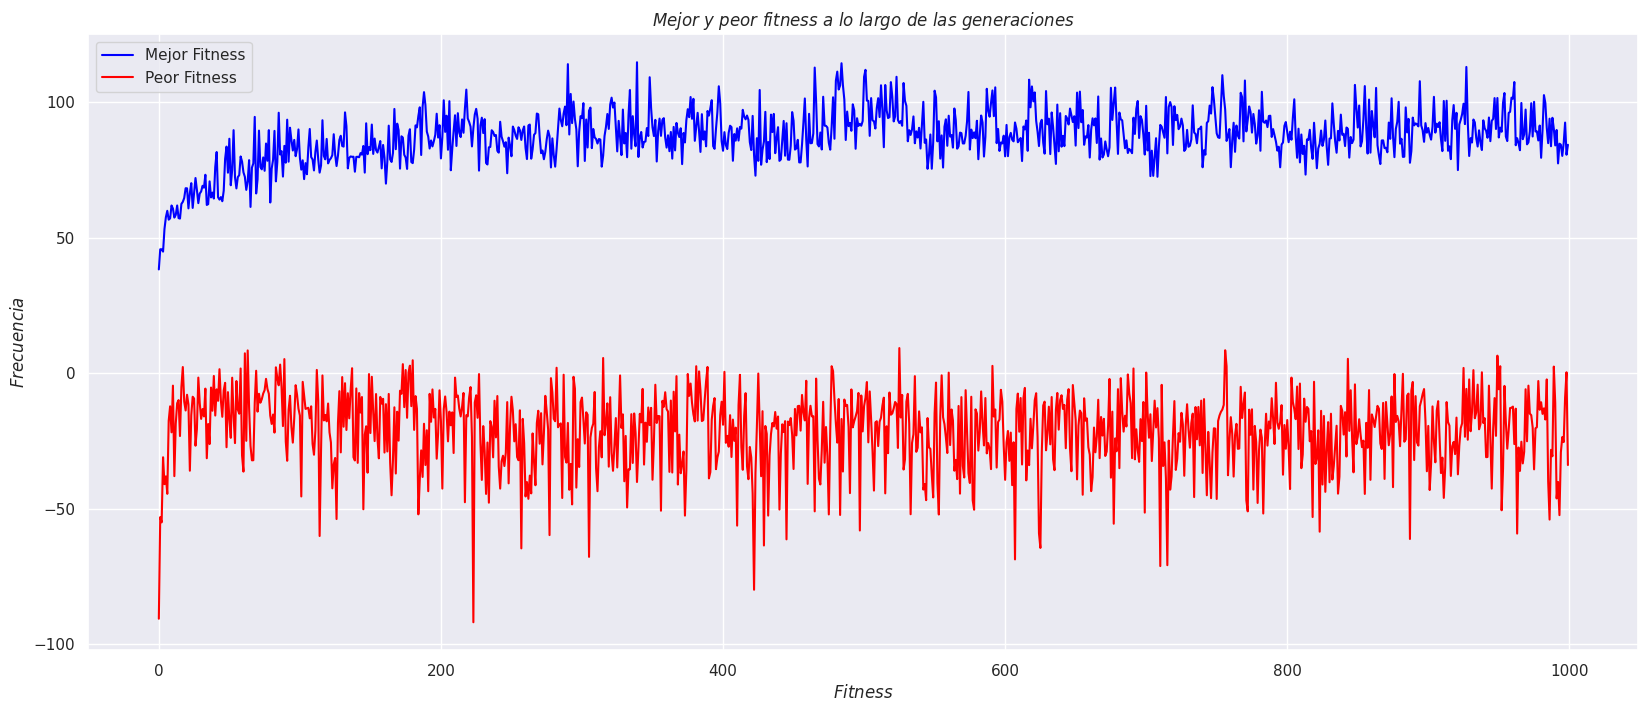

In [ ]:
population_12.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_12.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 42.86 ]

-> Mediana: [ 45.66666666666667 ]

-> Desviación standard: [ 22.311980339420046 ]

-> Máximo: [ 88.56666666666666 ]

-> Mínimo: [ -36.9 ]


# **Implementación de Robby el Robot - Con elitismo, acciones reducidas**
*Con 100 Individuos y **100** acciones.*
*Tablero de 100 celdas con una distribución promedio de 50 celdas.*

## **Experimento 1.**
***Selection = Tournament, Cross = Single , Mutation = Flip***

In [ ]:
population_7 = Population(size=100)
model_7 = GeneticAlgorithm(population_7, class_select='t',
                           class_cross='single', class_mut='flip',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0.5,
                           fitness_func=fitness, max_gen=1000)
best_ind7,best_fit7 = model_7.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

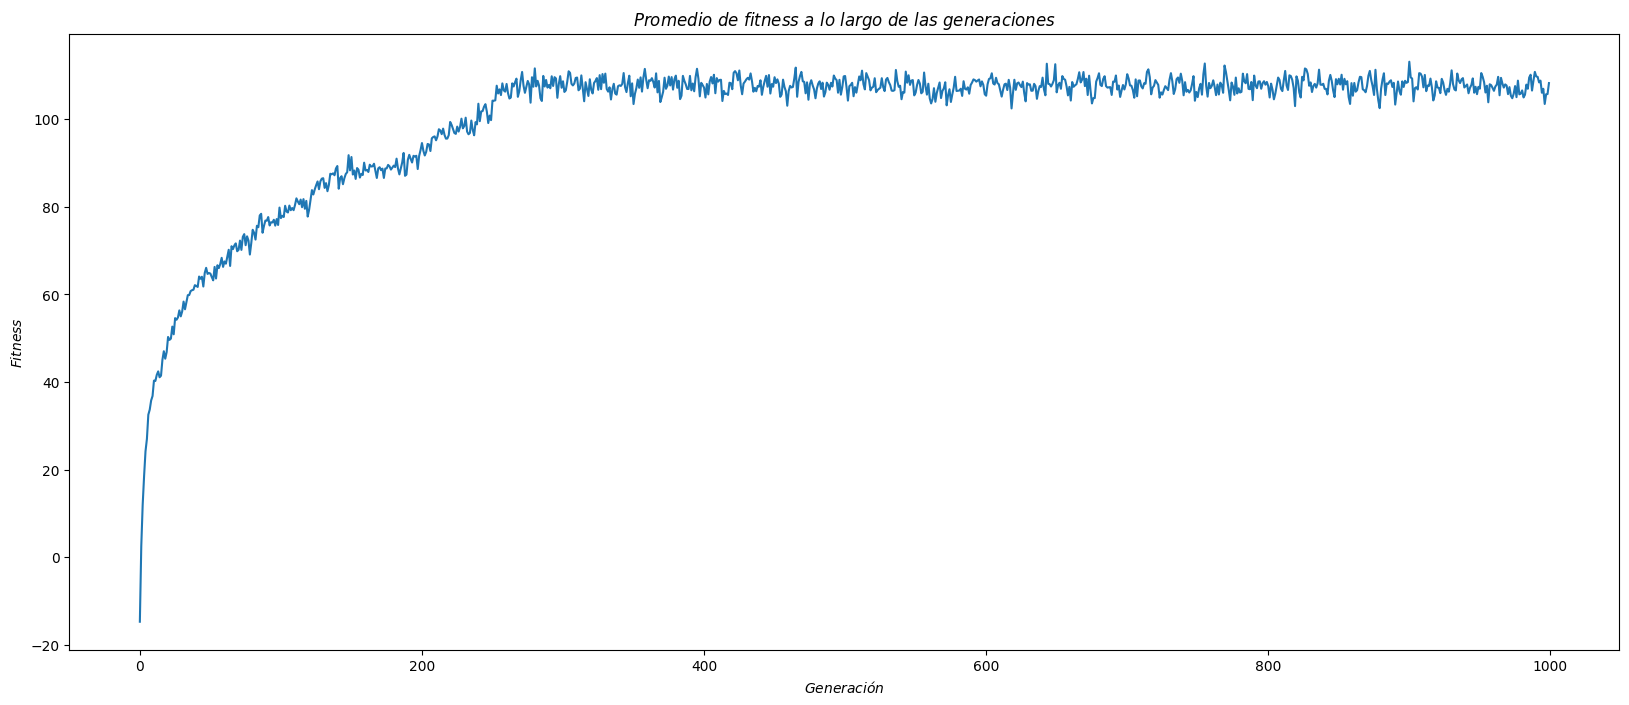

In [ ]:
population_7.mean_fitness()

**Histograma del fitness de la población**

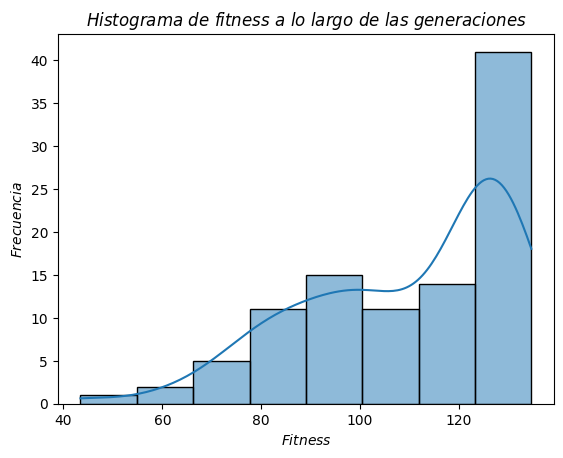

In [ ]:
population_7.hist_fitness()

**Diagrama de caja del fitness de una población**

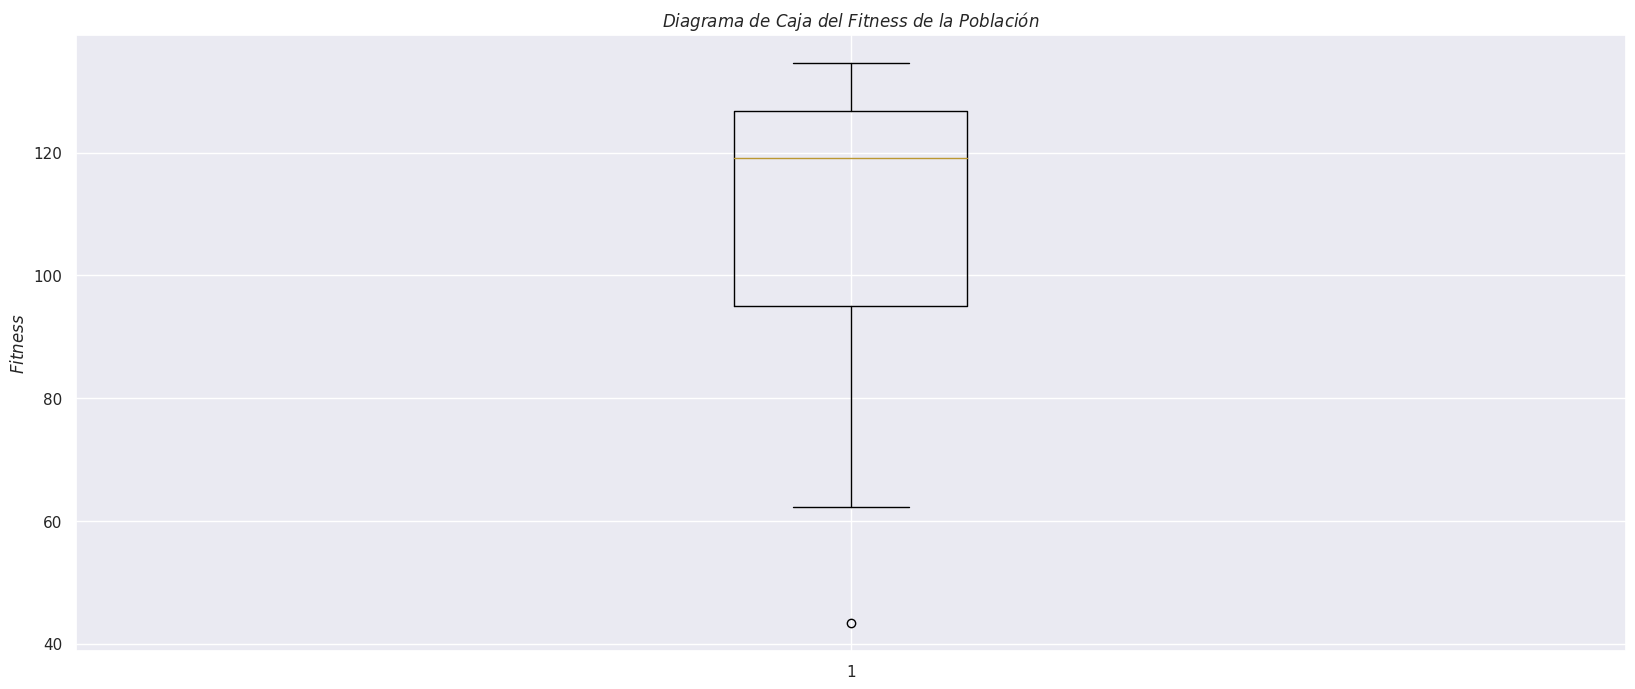

In [ ]:
population_7.boxplot()

**Fitness del mejor y peor individuo de la población**

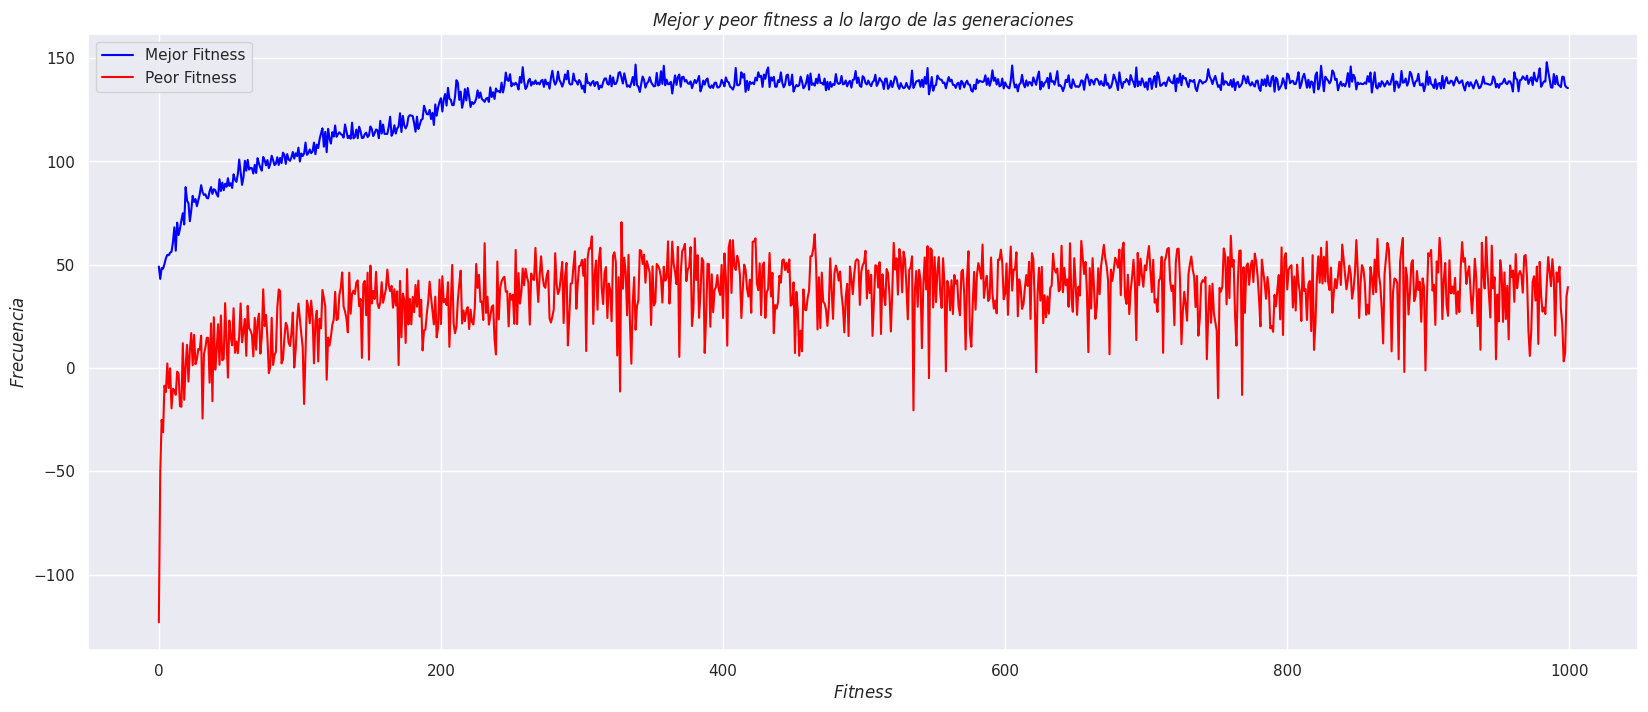

In [ ]:
population_7.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_7.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 109.819 ]

-> Mediana: [ 119.06666666666666 ]

-> Desviación standard: [ 20.61147213190859 ]

-> Máximo: [ 134.63333333333333 ]

-> Mínimo: [ 43.43333333333333 ]


## **Experimento 2.**
***Selection = Ranking Based, Cross = Double , Mutation = Swap***

In [ ]:
population_8 = Population(size=100)
model_8 = GeneticAlgorithm(population_8, class_select='rb',
                           class_cross='double', class_mut='swap',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0.5,
                           fitness_func=fitness, max_gen=1000)
best_ind8,best_fit8 = model_8.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

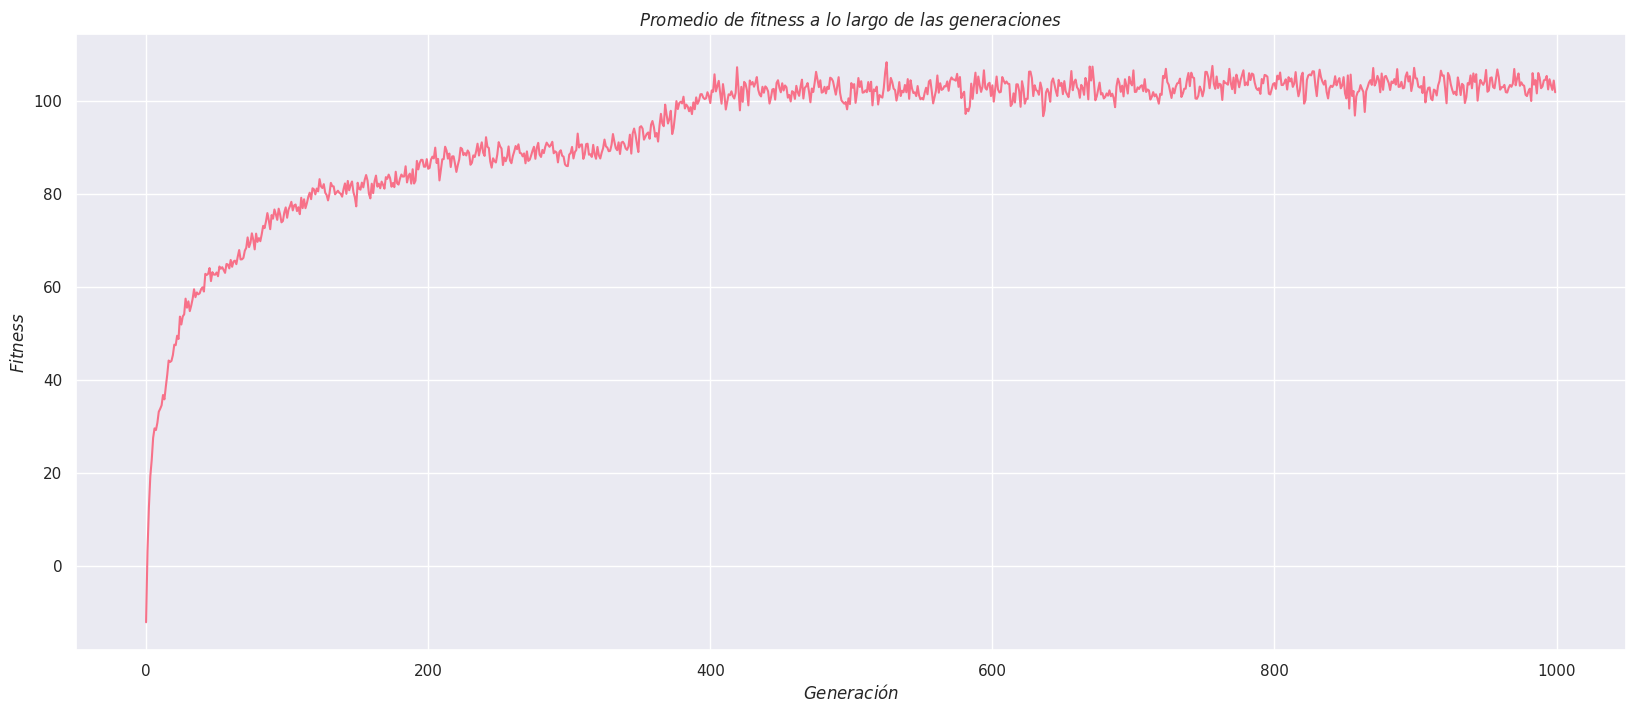

In [ ]:
population_8.mean_fitness()

**Histograma del fitness de la población**

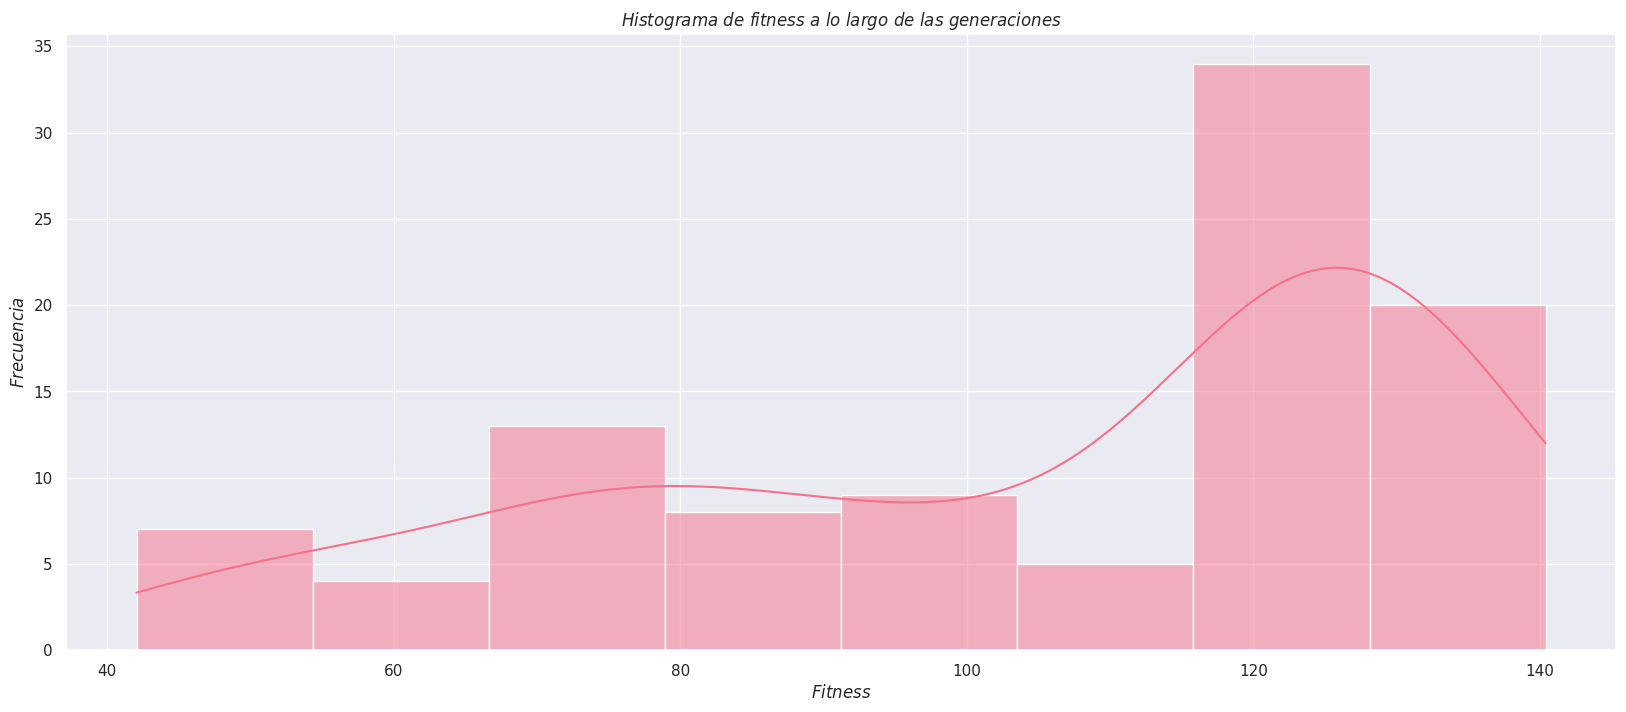

In [ ]:
population_8.hist_fitness()

**Diagrama de caja del fitness de una población**

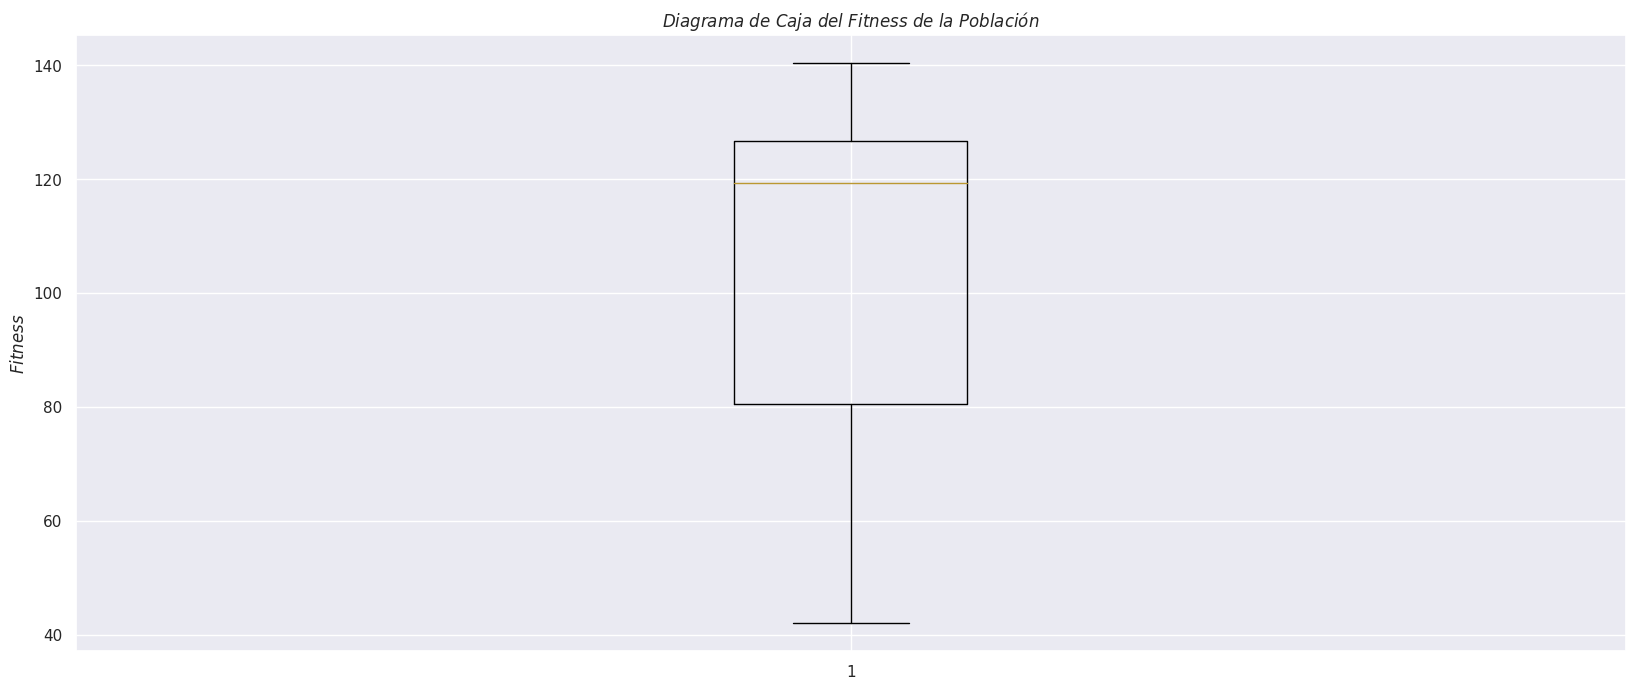

In [ ]:
population_8.boxplot()

**Fitness del mejor y peor individuo de la población**

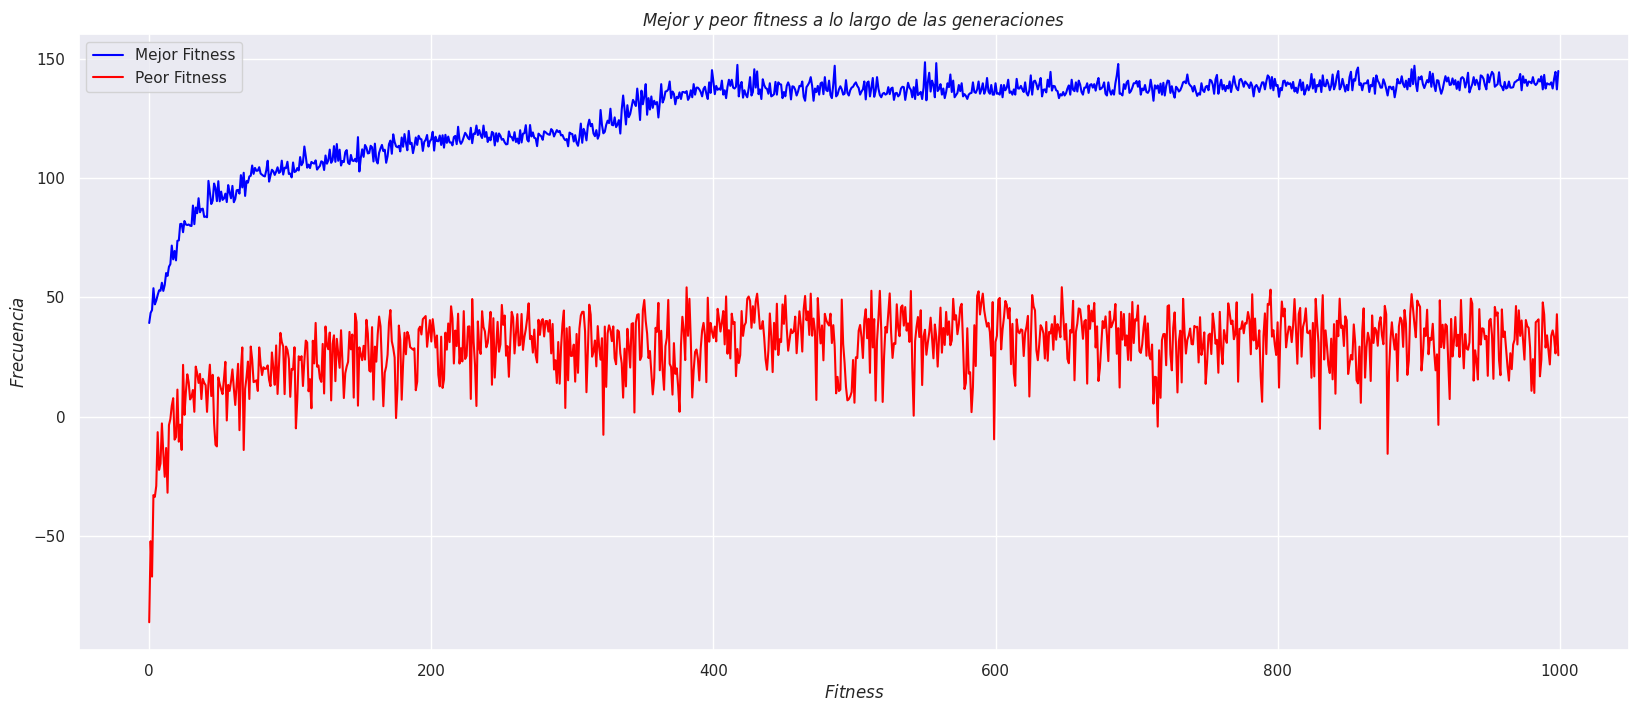

In [ ]:
population_8.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_8.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 104.89733333333332 ]

-> Mediana: [ 119.23333333333333 ]

-> Desviación standard: [ 27.790459066217508 ]

-> Máximo: [ 140.4 ]

-> Mínimo: [ 42.06666666666667 ]


## **Experimento 3.**
***Selection = Ruleta, Cross = Single , Mutation = Inversion***

In [ ]:
population_9 = Population(size=100)
model_9 = GeneticAlgorithm(population_9, class_select='t',
                           class_cross='single', class_mut='inv',
                           prob_cross=0.9, prob_mut=0.1, elite_size=0.5,
                           fitness_func=fitness, max_gen=1000)
best_ind9,best_fit9 = model_9.run()

  0%|          | 0/1000 [00:00<?, ?it/s]

**Promedio de fitness a lo largo de las generaciones**

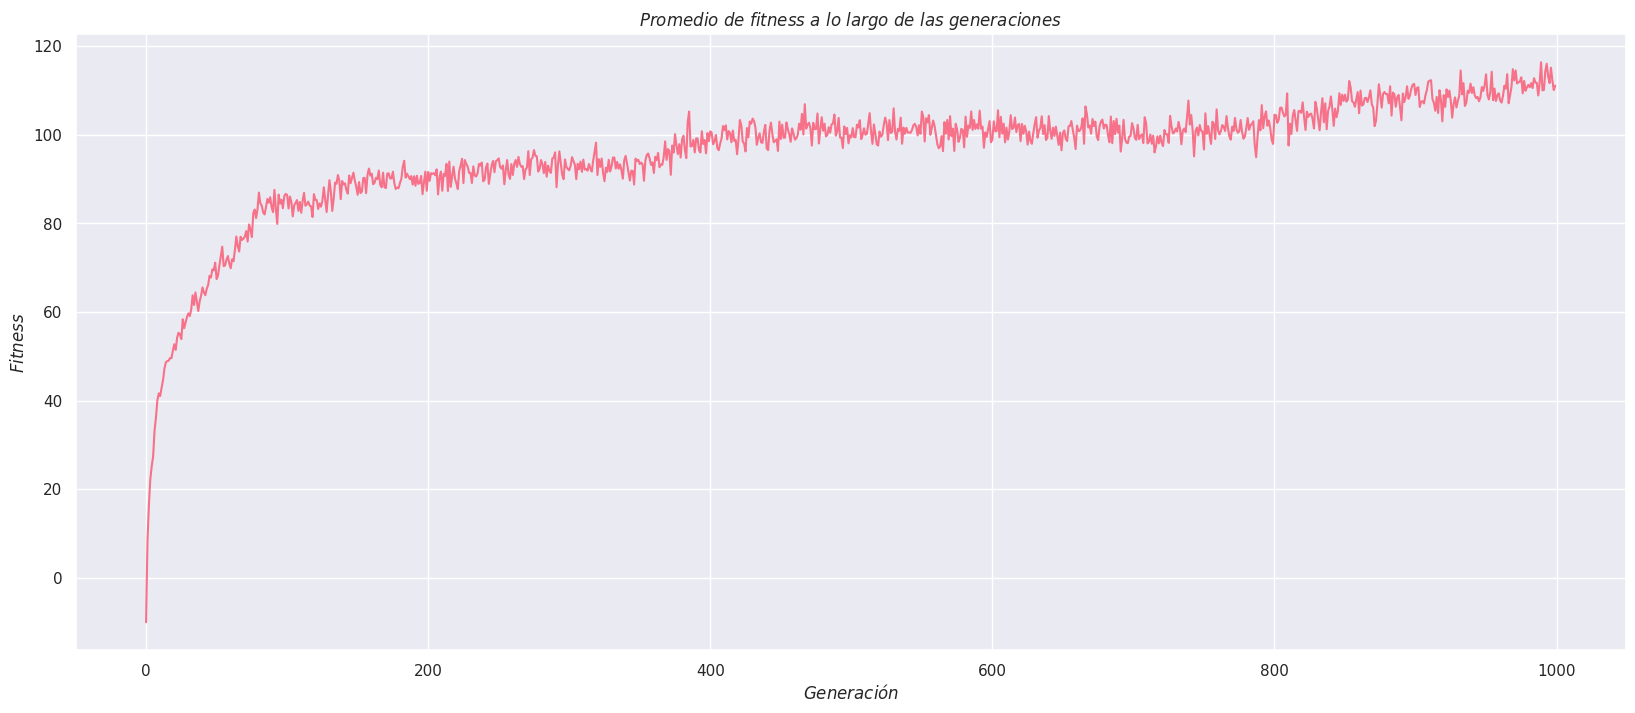

In [ ]:
population_9.mean_fitness()

**Histograma del fitness de la población**

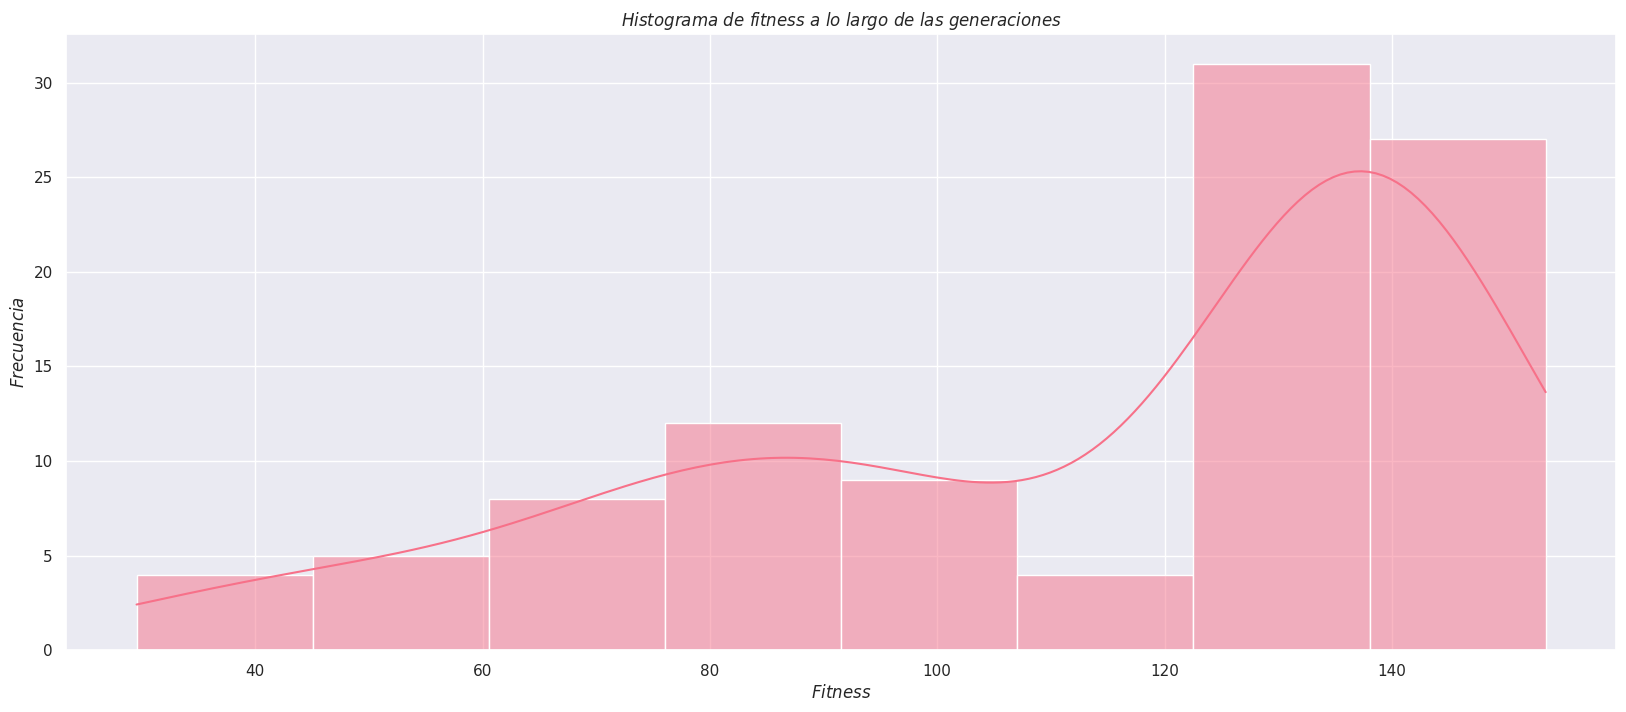

In [ ]:
population_9.hist_fitness()

**Diagrama de caja del fitness de una población**

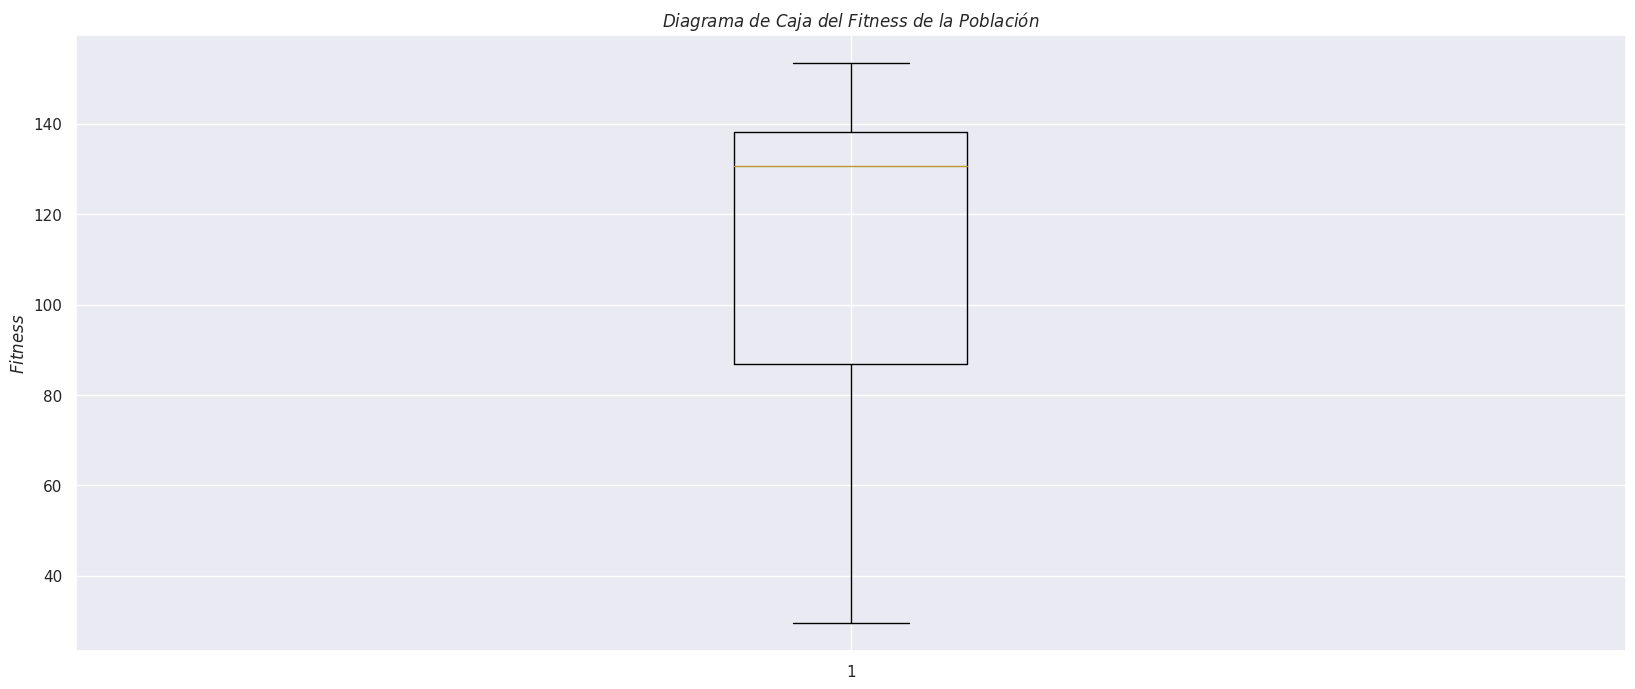

In [ ]:
population_9.boxplot()

**Fitness del mejor y peor individuo de la población**

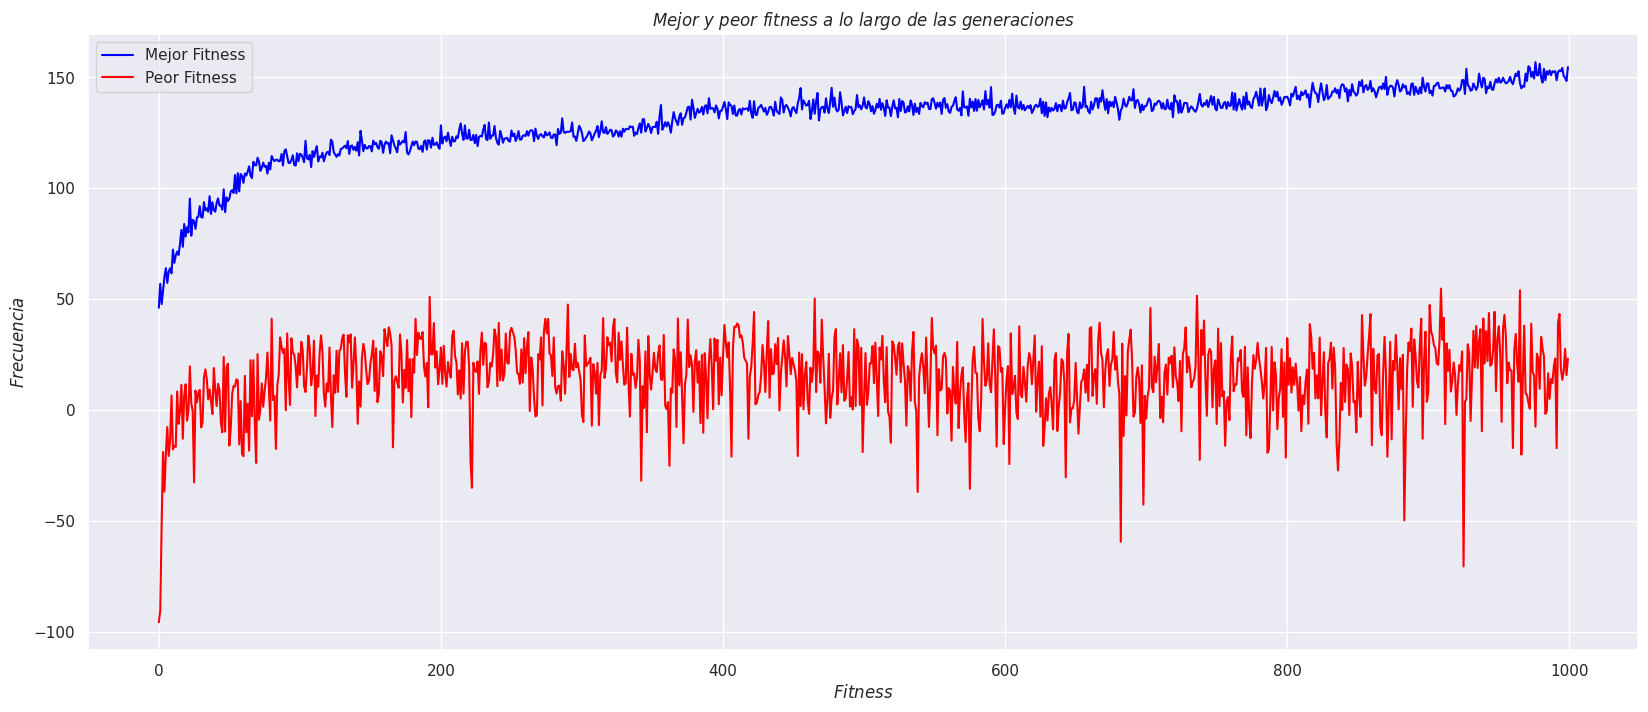

In [ ]:
population_9.best_and_worst_fitness()

**Resumen estadístico**

In [ ]:
population_9.stats_describe()

		 <<< RESUMEN ESTADÍSTICO >>> 

-> Media: [ 112.75466666666665 ]

-> Mediana: [ 130.61666666666667 ]

-> Desviación standard: [ 33.12270302979514 ]

-> Máximo: [ 153.53333333333333 ]

-> Mínimo: [ 29.566666666666666 ]
